# Trabalho de Data Mining

Alunos:<br>
Caetano Sasia dos Santos (17100898)<br>
Gabriel R. Fiorelli Miotto (14101376)<br>
Jean Carlos Gonçalves (13101285)<br>
Mateus Favarin Costa (18100539)<br>
Vinícius Soares Laghi (18103077)<br>



<div class="alert alert-block alert-danger">
<b>TODO:</b> Informações da fase 1 do CRISP-DM, informações inicias sobre o trabalho, sobre o problema e metodologia.
</div><br>

## Ferramentas Utilizadas

<div class="alert alert-block alert-danger">
<b>TODO:</b> Explicar melhor as ferramentas utilizadas.
</div>

* Anaconda: Anaconda offers the easiest way to perform Python/R data science and machine learning on a single machine. Start working with thousands of open-source packages and libraries today. Versão usada: '2.2.0'.
* Jupyter Notebook: Um dos componentes que o Anaconda tem, . Usado na versão '3.2.1'.
* Pandas Library: Versão
* Seaborn Library: Versão
* Python: Versão '3.9.7'.

***
## Problemas encontrados

### (JUPYTER) Falta de Memória ao subir todos os dados do .csv


Carregar todos os dados na memória no Jupyter gerou erro de memória, visto que o data set tem mais de 5 milhões de linhas:
```
MemoryError: Unable to allocate 353. MiB for an array with shape (8, 5783109) and data type float64
```

Solução:

Gerar o arquivo de configuração do Jupyter:

```
jupyter notebook --generate-config
```

Para verificar onde está o arquivo de configuração:
```
jupyter --paths
```
No arquivo "C:\Users\gabriel.fiorelli_hop\.jupyter\jupyter_notebook_config.py", alterar a config:

```
c.NotebookApp.max_buffer_size = 4294967296
```

### (DATASET) Problema com o Encoding

Foi necessário alterar o encoding para "ISO-8859-1" durante a leitura do .csv. Com o default ocorria erro.

#### Links de Ajuda

https://stackoverflow.com/questions/57948003/how-to-increase-jupyter-notebook-memory-limit

https://jupyter-notebook.readthedocs.io/en/stable/config.html

https://kegui.medium.com/change-jupyter-notebook-startup-folder-windows-608dfcfdc104

# Análise Exploratória

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap
from scipy.stats import pearsonr
from datetime import datetime

## Funções

In [2]:
def PrintAll(dataset):
    with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        print(dataset)

In [3]:
def PrintMissingData(dataset):
    total_linhas = len(dataset)

    print(total_linhas)

    dados_faltantes = dataset.isna().sum().reset_index(name='Faltantes')
    dados_faltantes['Faltantes_%'] = dados_faltantes['Faltantes'] / total_linhas


    PrintAll(dados_faltantes)

In [4]:
# Função utilizada para imprimir no pairplot o coeficiente de regressão do par de variáveis.
# Isto é exibido na diagonal superior.
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

***
## Carregamento dos Dados

In [5]:
# File: D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.csv
# https://drive.google.com/file/d/1w7RFxRM_nEWRjl6OGNERPPxeRx8Esowu/view?usp=sharing

data_file_dir = 'D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\Fontes de Dados\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.csv'
data = pd.read_csv(data_file_dir, encoding = "ISO-8859-1", delimiter=";")

In [6]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


In [7]:
data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

In [8]:
data.shape

(5783109, 76)

In [9]:
initial_rows = len(data)
initial_columns = len(data.columns)

print(f"Dataset inicial tem {initial_rows} linhas e {initial_columns} colunas.")

Dataset inicial tem 5783109 linhas e 76 colunas.


***
## Verificando a quantidade de dados por estado

Dado que o dataset completo tem mais de 5 milhões de linhas, optamos por pegar somente os dados de Santa Catarina.

Esta parte da exploração foi feita para identificar a quantidade de candidatos em cada estado e demonstrar quantos dados ficarão para a análise mais completa.

* Temos o dado de onde a prova foi realizada.
* Temos o dado da UF do candidato.

In [10]:
data_por_estado = data.groupby(['SG_UF_PROVA', 'SG_UF_ESC']).size().sort_values(ascending=False).reset_index(name='count').query('count >= 100')
#display(data_por_estado.to_string())

PrintAll(data_por_estado)

   SG_UF_PROVA SG_UF_ESC   count
0           SP        SP  166654
1           CE        CE  104394
2           MG        MG   70875
3           RJ        RJ   62186
4           PE        PE   47130
5           BA        BA   46769
6           PR        PR   42612
7           GO        GO   39093
8           RS        RS   36318
9           PA        PA   32759
10          AM        AM   29990
11          SC        SC   27025
12          MA        MA   25855
13          DF        DF   19299
14          PB        PB   19218
15          ES        ES   18264
16          PI        PI   15339
17          MT        MT   14535
18          RN        RN   14225
19          AL        AL   13658
20          MS        MS   11726
21          SE        SE   10834
22          RO        RO    9831
23          TO        TO    8174
24          AP        AP    3548
25          AC        AC    3488
26          RR        RR    2438
27          GO        DF     488
28          PE        PB     351
29        

In [11]:
data_por_estado_prova = data.groupby('SG_UF_PROVA').size().sort_values(ascending=False).reset_index(name='count') 

PrintAll(data_por_estado_prova)

   SG_UF_PROVA   count
0           SP  910492
1           MG  577211
2           BA  447691
3           RJ  387480
4           PA  330883
5           CE  325680
6           PE  315569
7           RS  249130
8           PR  239635
9           MA  238272
10          GO  211069
11          PB  164965
12          AM  163426
13          PI  134678
14          RN  131225
15          SC  121153
16          DF  116932
17          ES  105812
18          AL  102551
19          MT  101727
20          SE   88205
21          MS   84548
22          RO   69594
23          TO   59209
24          AP   47263
25          AC   41824
26          RR   16885


In [12]:
data_por_estado_candidato = data.groupby('SG_UF_ESC').size().sort_values(ascending=False).reset_index(name='count') 
#display(data_por_estado.to_string())

PrintAll(data_por_estado_candidato)

   SG_UF_ESC   count
0         SP  167183
1         CE  104981
2         MG   71614
3         RJ   62583
4         PE   47583
5         BA   47235
6         PR   43060
7         GO   39769
8         RS   36478
9         PA   33109
10        AM   30120
11        SC   27373
12        MA   26104
13        DF   19840
14        PB   19760
15        ES   18419
16        PI   15738
17        MT   14674
18        RN   14327
19        AL   13976
20        MS   11851
21        SE   10878
22        RO    9927
23        TO    8457
24        AP    3565
25        AC    3512
26        RR    2453


## Checagem de Valores Faltantes

Dado a diferença entre a quantidade de candidatos realizando a prova em um estado e a quantidade de candidatos de cada estado. Provavelmente o dataset tem dados faltantes do estado dos candidatos.

In [13]:
PrintMissingData(data)

5783109
                     index  Faltantes  Faltantes_%
0             NU_INSCRICAO          0        0.000
1                   NU_ANO          0        0.000
2          TP_FAIXA_ETARIA          0        0.000
3                  TP_SEXO          0        0.000
4          TP_ESTADO_CIVIL          0        0.000
5              TP_COR_RACA          0        0.000
6         TP_NACIONALIDADE          0        0.000
7          TP_ST_CONCLUSAO          0        0.000
8          TP_ANO_CONCLUIU          0        0.000
9                TP_ESCOLA          0        0.000
10               TP_ENSINO    4479663        0.775
11            IN_TREINEIRO          0        0.000
12        CO_MUNICIPIO_ESC    4878540        0.844
13        NO_MUNICIPIO_ESC    4878540        0.844
14               CO_UF_ESC    4878540        0.844
15               SG_UF_ESC    4878540        0.844
16  TP_DEPENDENCIA_ADM_ESC    4878540        0.844
17      TP_LOCALIZACAO_ESC    4878540        0.844
18         TP_SIT_FUNC_

A quantidade de valores faltantes para o campo 'SG_UF_ESC' é bem alta. Das 5783109 entradas, 4878540 (0.844) estão com este campo NULL.

### Dados de Provas feitas em SC
Levando em conta os dados de provas que foram realizadas em SC.

In [14]:
data_sc = data[data['SG_UF_PROVA'] == 'SC']
#display(data_por_estado.to_string())

PrintMissingData(data_sc)



121153
                     index  Faltantes  Faltantes_%
0             NU_INSCRICAO          0        0.000
1                   NU_ANO          0        0.000
2          TP_FAIXA_ETARIA          0        0.000
3                  TP_SEXO          0        0.000
4          TP_ESTADO_CIVIL          0        0.000
5              TP_COR_RACA          0        0.000
6         TP_NACIONALIDADE          0        0.000
7          TP_ST_CONCLUSAO          0        0.000
8          TP_ANO_CONCLUIU          0        0.000
9                TP_ESCOLA          0        0.000
10               TP_ENSINO      81909        0.676
11            IN_TREINEIRO          0        0.000
12        CO_MUNICIPIO_ESC      93638        0.773
13        NO_MUNICIPIO_ESC      93638        0.773
14               CO_UF_ESC      93638        0.773
15               SG_UF_ESC      93638        0.773
16  TP_DEPENDENCIA_ADM_ESC      93638        0.773
17      TP_LOCALIZACAO_ESC      93638        0.773
18         TP_SIT_FUNC_E

A quantidade de valores faltantes para o campo 'SG_UF_ESC' para os dados exclusivos de provas feitas em SC também é alto. Das 121153 entradas, 93638 (0.773) estão com este campo NULL.

### Motivo de Ausência de dados

https://g1.globo.com/educacao/enem/2020/noticia/2021/01/24/abstencao-do-enem-2020-e-de-553percent-24-milhoes-foram-aos-locais-de-prova-neste-domingo.ghtml

In [15]:
presencas = data.groupby(['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']).size().sort_values(ascending=False).reset_index(name='count')

PrintAll(presencas)

   TP_PRESENCA_CN  TP_PRESENCA_CH  TP_PRESENCA_LC  TP_PRESENCA_MT    count
0               0               0               0               0  3016082
1               1               1               1               1  2588681
2               0               1               1               0   164066
3               1               0               0               1     8482
4               0               2               2               0     4095
5               2               1               1               2     1393
6               1               2               2               1      277
7               2               0               0               2       26
8               2               2               2               2        7


***
### Filtrando Linhas de Candidatos com as 4 provas feitas
   
Somente candidatos que fizeram as 4 provas:

In [16]:
data = data[(data["TP_PRESENCA_CN"]==1) & (data["TP_PRESENCA_CH"]==1) & (data["TP_PRESENCA_LC"]==1) & (data["TP_PRESENCA_MT"]==1)]

data.shape

(2588681, 76)

***
### Filtrando Linhas de Candidatos que fizeram a prova para treino
   
Somente candidatos que fizeram a prova sem a opção de treino:

In [17]:
treineiro = data.groupby(['IN_TREINEIRO']).size().sort_values(ascending=False).reset_index(name='count')
PrintAll(treineiro)

   IN_TREINEIRO    count
0             0  2242169
1             1   346512


In [18]:
data = data[(data["IN_TREINEIRO"]==0)]
data.shape

(2242169, 76)

### Verificando novamente os dados faltantes

Após manter apenas os alunos que fizeram as 4 provas, buscamos novamente pelos dados faltantes.

In [19]:
PrintMissingData(data)

2242169
                     index  Faltantes  Faltantes_%
0             NU_INSCRICAO          0        0.000
1                   NU_ANO          0        0.000
2          TP_FAIXA_ETARIA          0        0.000
3                  TP_SEXO          0        0.000
4          TP_ESTADO_CIVIL          0        0.000
5              TP_COR_RACA          0        0.000
6         TP_NACIONALIDADE          0        0.000
7          TP_ST_CONCLUSAO          0        0.000
8          TP_ANO_CONCLUIU          0        0.000
9                TP_ESCOLA          0        0.000
10               TP_ENSINO    1452061        0.648
11            IN_TREINEIRO          0        0.000
12        CO_MUNICIPIO_ESC    1704260        0.760
13        NO_MUNICIPIO_ESC    1704260        0.760
14               CO_UF_ESC    1704260        0.760
15               SG_UF_ESC    1704260        0.760
16  TP_DEPENDENCIA_ADM_ESC    1704260        0.760
17      TP_LOCALIZACAO_ESC    1704260        0.760
18         TP_SIT_FUNC_

Notamos que as colunas TP_ENSINO, CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC, TP_LOCALIZACAO_ESC e TP_SIT_FUNC_ESC continuam com uma quantidade muito grande de dados faltantes. Estas colunas serão então removidas.<br>

<div class="alert alert-block alert-warning">
<b>TODO - Investigar:</b> As colunas 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC', 'P_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC'e 'TP_SIT_FUNC_ESC' tem a mesma quantidade de dados faltantes. Existe algum padrão de quando estes dados estão disponíveis?
</div>

### Removendo colunas com muitos dados faltantes

In [20]:
print(f"Shape before: {data.shape}")
data.drop('TP_ENSINO', inplace=True, axis=1)
data.drop('CO_MUNICIPIO_ESC', inplace=True, axis=1)
data.drop('NO_MUNICIPIO_ESC', inplace=True, axis=1)
data.drop('CO_UF_ESC', inplace=True, axis=1)
data.drop('SG_UF_ESC', inplace=True, axis=1)
data.drop('TP_DEPENDENCIA_ADM_ESC', inplace=True, axis=1)
data.drop('TP_LOCALIZACAO_ESC', inplace=True, axis=1)
data.drop('TP_SIT_FUNC_ESC', inplace=True, axis=1)
print(f"Shape after: {data.shape}")


Shape before: (2242169, 76)
Shape after: (2242169, 68)


### Verificando novamente os dados faltantes

Após remover as colunas que continham muitos dados faltantes.

In [21]:
PrintMissingData(data)

2242169
                 index  Faltantes  Faltantes_%
0         NU_INSCRICAO          0        0.000
1               NU_ANO          0        0.000
2      TP_FAIXA_ETARIA          0        0.000
3              TP_SEXO          0        0.000
4      TP_ESTADO_CIVIL          0        0.000
5          TP_COR_RACA          0        0.000
6     TP_NACIONALIDADE          0        0.000
7      TP_ST_CONCLUSAO          0        0.000
8      TP_ANO_CONCLUIU          0        0.000
9            TP_ESCOLA          0        0.000
10        IN_TREINEIRO          0        0.000
11  CO_MUNICIPIO_PROVA          0        0.000
12  NO_MUNICIPIO_PROVA          0        0.000
13         CO_UF_PROVA          0        0.000
14         SG_UF_PROVA          0        0.000
15      TP_PRESENCA_CN          0        0.000
16      TP_PRESENCA_CH          0        0.000
17      TP_PRESENCA_LC          0        0.000
18      TP_PRESENCA_MT          0        0.000
19         CO_PROVA_CN          0        0.000
20   

### Removendo dados faltantes das questões

Visto que cerca de 1,1% dos registros não tem as questões socioeconômicas respondidas, removeremos estas linhas.

In [22]:
print(f"Shape before: {data.shape}")
data = data.dropna()
print(f"Shape after: {data.shape}")

PrintMissingData(data)

Shape before: (2242169, 68)
Shape after: (2214797, 68)
2214797
                 index  Faltantes  Faltantes_%
0         NU_INSCRICAO          0          0.0
1               NU_ANO          0          0.0
2      TP_FAIXA_ETARIA          0          0.0
3              TP_SEXO          0          0.0
4      TP_ESTADO_CIVIL          0          0.0
5          TP_COR_RACA          0          0.0
6     TP_NACIONALIDADE          0          0.0
7      TP_ST_CONCLUSAO          0          0.0
8      TP_ANO_CONCLUIU          0          0.0
9            TP_ESCOLA          0          0.0
10        IN_TREINEIRO          0          0.0
11  CO_MUNICIPIO_PROVA          0          0.0
12  NO_MUNICIPIO_PROVA          0          0.0
13         CO_UF_PROVA          0          0.0
14         SG_UF_PROVA          0          0.0
15      TP_PRESENCA_CN          0          0.0
16      TP_PRESENCA_CH          0          0.0
17      TP_PRESENCA_LC          0          0.0
18      TP_PRESENCA_MT          0          0

### Outras colunas que podem ser removidas

* NU_INSCRICAO: É apenas uma máscara para o número de inscrição do candidato.
* TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC e TP_PRESENCA_MT: Colunas foram úteis pra filtrar os dados de provas válidas, mas não servirão para nada nas análises posteriores, dado que todos os dados são 1.
* TX_RESPOSTAS_CN: Vetor com as respostas da parte objetiva da prova de Ciências da Natureza 
* TX_RESPOSTAS_CH: Vetor com as respostas da parte objetiva da prova de Ciências Humanas
* TX_RESPOSTAS_LC: Vetor com as respostas da parte objetiva da prova de Linguagens e Códigos
* TX_RESPOSTAS_MT: Vetor com as respostas da parte objetiva da prova de Matemática
* TX_GABARITO_CN: Vetor com o gabarito da parte objetiva da prova de Ciências da Natureza
* TX_GABARITO_CH: Vetor com o gabarito da parte objetiva da prova de Ciências Humanas
* TX_GABARITO_LC: Vetor com o gabarito da parte objetiva da prova de Linguagens e Códigos
* TX_GABARITO_MT: Vetor com o gabarito da parte objetiva da prova de Matemática


In [23]:
print(f"Shape before: {data.shape}")
data.drop('NU_INSCRICAO', inplace=True, axis=1)
data.drop('TP_PRESENCA_CN', inplace=True, axis=1)
data.drop('TP_PRESENCA_CH', inplace=True, axis=1)
data.drop('TP_PRESENCA_LC', inplace=True, axis=1)
data.drop('TP_PRESENCA_MT', inplace=True, axis=1)
data.drop('TX_RESPOSTAS_CN', inplace=True, axis=1)
data.drop('TX_RESPOSTAS_CH', inplace=True, axis=1)
data.drop('TX_RESPOSTAS_LC', inplace=True, axis=1)
data.drop('TX_RESPOSTAS_MT', inplace=True, axis=1)
data.drop('TX_GABARITO_CN', inplace=True, axis=1)
data.drop('TX_GABARITO_CH', inplace=True, axis=1)
data.drop('TX_GABARITO_LC', inplace=True, axis=1)
data.drop('TX_GABARITO_MT', inplace=True, axis=1)
print(f"Shape after: {data.shape}")

Shape before: (2214797, 68)
Shape after: (2214797, 55)


In [24]:
data.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
       'CO_UF_PROVA', 'SG_UF_PROVA', 'CO_PROVA_CN', 'CO_PROVA_CH',
       'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025'],
      dtype='object')

## Distribuições

### Análise Geral

In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_ANO,2214797.0,2.020000e+03,0.000000,2020.0,2020.0,2020.0,2020.0,2020.0
TP_FAIXA_ETARIA,2214797.0,5.728032e+00,3.819509,1.0,3.0,4.0,8.0,20.0
TP_ESTADO_CIVIL,2214797.0,1.068340e+00,0.416155,0.0,1.0,1.0,1.0,4.0
TP_COR_RACA,2214797.0,2.119397e+00,1.012848,0.0,1.0,2.0,3.0,5.0
TP_NACIONALIDADE,2214797.0,1.030197e+00,0.206571,0.0,1.0,1.0,1.0,4.0
TP_ST_CONCLUSAO,2214797.0,1.372985e+00,0.502833,1.0,1.0,1.0,2.0,4.0
TP_ANO_CONCLUIU,2214797.0,2.841335e+00,4.171837,0.0,0.0,1.0,4.0,14.0
TP_ESCOLA,2214797.0,1.436593e+00,0.626236,1.0,1.0,1.0,2.0,3.0
IN_TREINEIRO,2214797.0,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0
CO_MUNICIPIO_PROVA,2214797.0,3.063402e+06,994812.398023,1100015.0,2402006.0,3106200.0,3547809.0,5300108.0


****
###  Média das Notas

Grande parcela das universidades usam a nota do ENEM gerando uma média simples entre as 5 notas.<br>
Para caracterizar o desempenho geral dos estudantes, faremos o mesmo aqui, adicionando uma coluna NU_NOTA_AVG que representa esta média simples.


In [26]:
data['NU_NOTA_AVG'] = (data['NU_NOTA_REDACAO'] + data['NU_NOTA_CN'] + data['NU_NOTA_CH'] + data['NU_NOTA_LC'] + data['NU_NOTA_MT']) / 5

### Distribuições de Notas

<AxesSubplot:xlabel='NU_NOTA_AVG', ylabel='Count'>

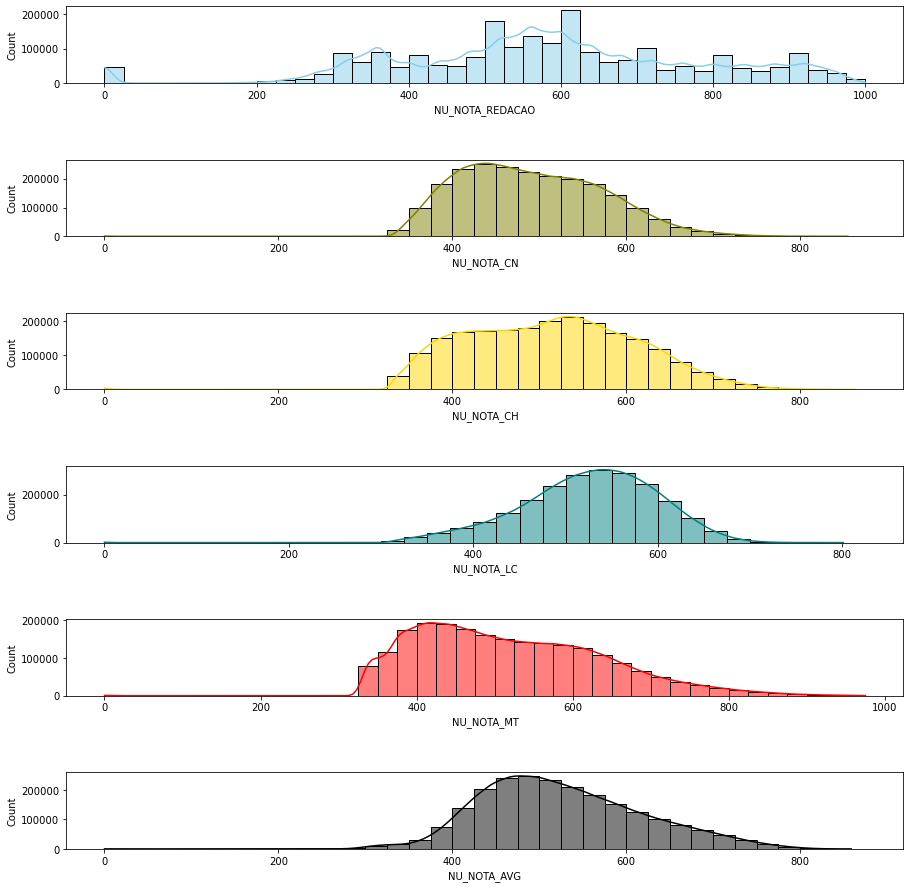

In [27]:
fig, axs = plt.subplots(6, figsize=(15, 15))
#fig, axs = plt.subplots(plots, figsize=(15, plot_height))
fig.subplots_adjust(bottom = 0.1, hspace=1)
sns.histplot(data, x="NU_NOTA_REDACAO", binwidth=25, kde=True, color="skyblue", ax=axs[0])
sns.histplot(data, x="NU_NOTA_CN", binwidth=25, kde=True, color="olive", ax=axs[1])
sns.histplot(data, x="NU_NOTA_CH", binwidth=25, kde=True, color="gold", ax=axs[2])
sns.histplot(data, x="NU_NOTA_LC", binwidth=25, kde=True, color="teal", ax=axs[3])
sns.histplot(data, x="NU_NOTA_MT", binwidth=25, kde=True, color="red", ax=axs[4])
sns.histplot(data, x="NU_NOTA_AVG", binwidth=25, kde=True, color="black", ax=axs[5])

# Ajustar a mesma escala. No gráfico os valores mostrados no eixo X são diferentes.


As notas de redação são mais espalhadas (tem o maior desvio padrão) dentre as 5 notas finais de avaliação. Isto talvez aconteça pela forma como a nota é calculada e pelo fato de que é possível que o candidato sere algum dos críterios de avaliação da prova.

In [28]:
data[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_AVG']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NU_NOTA_REDACAO,2214797.0,581.238624,196.768344,0.0,460.00,580.00,700.00,1000.00
NU_NOTA_CN,2214797.0,490.927547,80.913620,0.0,426.70,483.40,549.50,854.80
NU_NOTA_CH,2214797.0,514.472532,95.989007,0.0,437.70,514.90,584.30,862.60
NU_NOTA_LC,2214797.0,525.684687,73.546343,0.0,479.30,531.00,578.00,801.10
NU_NOTA_MT,2214797.0,519.725287,118.384590,0.0,424.00,503.00,601.40,975.00
NU_NOTA_AVG,2214797.0,526.409735,92.540623,0.0,458.44,515.42,586.82,858.58


****
### Correlação entre as notas de prova

Os alunos que vão bem em uma prova, costumam ir bem nas demais?<br>
É possível imaginar que estas comparações em pares de notas gere um resultado "categórico" que pode ser dividido em 4 quadrantes:
1. Superior Esquerdo: Candidatos que foram BEM na prova Y e MAL na prova X.
1. Superior Direito: Candidatos que foram BEM tanto na prova Y quanto na prova X.
1. Inferior Esquerdo: Candidatos que foram MAL tanto na prova Y quanto na prova X.
1. Inferior Direito: Candidatos que foram MAL na prova Y e BEM na prova X.

Levando este raciocínio para as 5 dimensões (5 notas de prova). É possível encontrar os candidatos que foram bem em todas as provas, ou seja, o equivalente a encontrar o quadrando superior direito, mas não usando apenas duas dimensões.<br>

<div class="alert alert-block alert-warning">
<b>TODO - Melhorar:</b>
    Podemos usar este raciocínio para categorizar os candidatos em relação a ter ido muito bem, bem, médio, mal ou muito mal nas provas.<br>
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
</div>

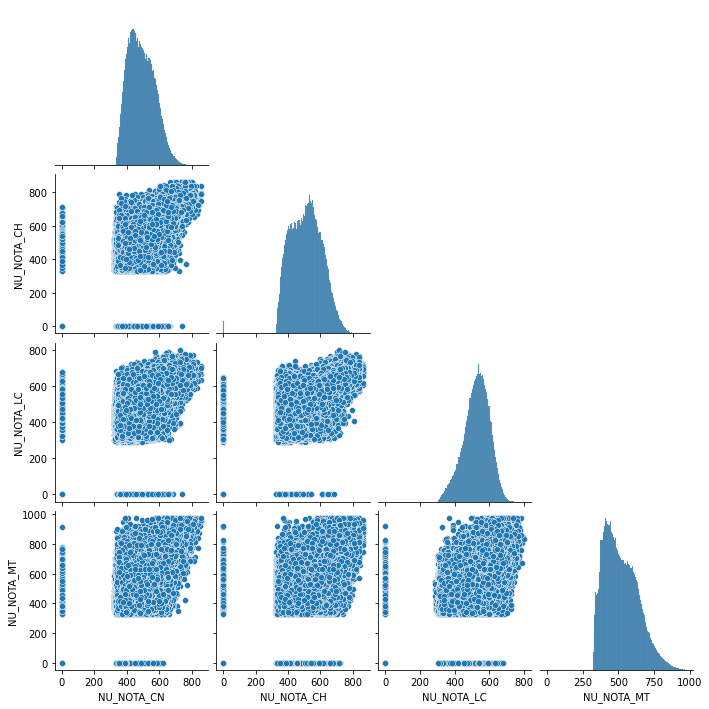

In [29]:
#sns.pairplot(data[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])
g = sns.pairplot(data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']], corner=True)

## Colocar a correção na diagonal superior e a dispersão na diagonal inferior:
## https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot

#def reg_coef(x,y,label=None,color=None,**kwargs):
#    ax = plt.gca()
#    r,p = pearsonr(x,y)
#    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
#    ax.set_axis_off()
#    
#g = sns.pairplot(data[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']])
#g.map_diag(sns.distplot)
#g.map_lower(sns.regplot)
#g.map_upper(reg_coef)

Além disto, podemos ver a correção das notas de prova através do heatmap:

<AxesSubplot:>

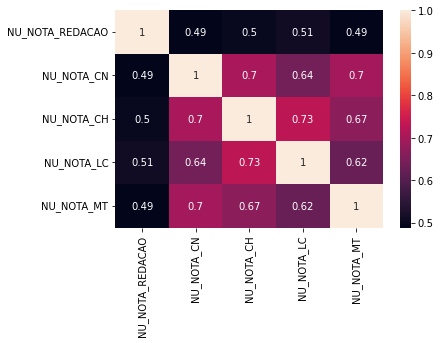

In [30]:
sns.heatmap(data[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].corr(), annot = True)

****
### Outras distribuições (Categóricas)

Antes de gerar os gráficos para as demais distribuições (as categóricas) será necessário carregar as dimensões do dicionário de dados para que seja possível entender o significado delas.<br>
Estas informações estão em um outro arquivo .csv que pode ser encontrado juntamente com o dataset original.


***
## Carregamento das Dimensões

Deixamos preparado um modelo para pegar as dimensões do arquivo de dicionário de dados do ENEM.<br>
Isto serve para substituir os valores categóricos com identificadores sequenciais pelos valores reais (texto) caso seja necessário.


Arquivo com as dimensões dos valores
```
D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\microdados_enem_2020\DICIONÁRIO\Dicionário_Microdados_Enem_2020.xlsx
```

In [31]:
dimension_file_dir = "D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\Fontes de Dados\microdados_enem_2020\DICIONÁRIO\Dicionário_Microdados_Enem_2020.xlsx"
dimension = pd.read_excel(dimension_file_dir, header=None)

In [32]:
dimension.head()


,0,1,2,3,4,5
0,DICIONÁRIO DE VARIÁVEIS - ENEM 2020,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NOME DA VARIÁVEL,Descrição,Variáveis Categóricas,NaN,Tamanho,Tipo
3,NaN,NaN,Categoria,Descrição,NaN,NaN
4,DADOS DO PARTICIPANTE,NaN,NaN,NaN,NaN,NaN


### Dimensão - Faixa Etária

In [33]:
tp_faixa_etaria = dimension.filter([2, 3], axis=1)
tp_faixa_etaria = tp_faixa_etaria.iloc[7:27]
tp_faixa_etaria.columns = ['id_faixa_etaria', 'faixa_etaria']
tp_faixa_etaria = tp_faixa_etaria.set_index('id_faixa_etaria')
print(tp_faixa_etaria.to_string())

                       faixa_etaria
id_faixa_etaria                    
1                  Menor de 17 anos
2                           17 anos
3                           18 anos
4                           19 anos
5                           20 anos
6                           21 anos
7                           22 anos
8                           23 anos
9                           24 anos
10                          25 anos
11               Entre 26 e 30 anos
12               Entre 31 e 35 anos
13               Entre 36 e 40 anos
14               Entre 41 e 45 anos
15               Entre 46 e 50 anos
16               Entre 51 e 55 anos
17               Entre 56 e 60 anos
18               Entre 61 e 65 anos
19               Entre 66 e 70 anos
20                 Maior de 70 anos


### Dimensão - Sexo

In [34]:
tp_sexo = dimension.filter([2, 3], axis=1)
tp_sexo = tp_sexo.iloc[27:29]
tp_sexo.columns = ['id_sexo', 'sexo']
tp_sexo = tp_sexo.sort_values(['sexo'], ascending=True).reset_index(drop=True)
print(tp_sexo.to_string())

  id_sexo       sexo
0       F  Feminino 
1       M  Masculino


### Dimensão - Estado Civil

In [35]:
tp_estado_civil = dimension.filter([2, 3], axis=1)
tp_estado_civil = tp_estado_civil.iloc[29:34]
tp_estado_civil.columns = ['id_estado_civil', 'estado_civil']
tp_estado_civil = tp_estado_civil.reset_index(drop=True)
print(tp_estado_civil.to_string())

  id_estado_civil                             estado_civil
0               0                            Não informado
1               1                              Solteiro(a)
2               2        Casado(a)/Mora com companheiro(a)
3               3  Divorciado(a)/Desquitado(a)/Separado(a)
4               4                                 Viúvo(a)


### Dimensão - Cor e Raça

In [36]:
tp_cor_raca = dimension.filter([2, 3], axis=1)
tp_cor_raca = tp_cor_raca.iloc[34:40]
tp_cor_raca.columns = ['id_cor_raca', 'cor_raca']
tp_cor_raca = tp_cor_raca.reset_index(drop=True)
print(tp_cor_raca.to_string())

  id_cor_raca       cor_raca
0           0  Não declarado
1           1         Branca
2           2          Preta
3           3          Parda
4           4        Amarela
5           5      Indígena 


### Dimensão - Nacionalidade

In [37]:
tp_nacionalidade = dimension.filter([2, 3], axis=1)
tp_nacionalidade = tp_nacionalidade.iloc[40:45]
tp_nacionalidade.columns = ['id_nacionalidade', 'nacionalidade']
tp_nacionalidade = tp_nacionalidade.reset_index(drop=True)
print(tp_nacionalidade.to_string())

  id_nacionalidade                                  nacionalidade
0                0                                  Não informado
1                1                                  Brasileiro(a)
2                2                  Brasileiro(a) Naturalizado(a)
3                3                                 Estrangeiro(a)
4                4  Brasileiro(a) Nato(a), nascido(a) no exterior


### Dimensão - Situação de Conclusão do Ensino Médio

In [38]:
tp_situacao_conclusao = dimension.filter([2, 3], axis=1)
tp_situacao_conclusao = tp_situacao_conclusao.iloc[45:49]
tp_situacao_conclusao.columns = ['id', 'situacao_conclusao']
tp_situacao_conclusao = tp_situacao_conclusao.set_index('id')
print(tp_situacao_conclusao.to_string())

                                      situacao_conclusao
id                                                      
1                              Já concluí o Ensino Médio
2     Estou cursando e concluirei o Ensino Médio em 2020
3   Estou cursando e concluirei o Ensino Médio após 2020
4        Não concluí e não estou cursando o Ensino Médio


### Dimensão - Ano Conclusão Ensino Médio

In [39]:
tp_ano_conclusao = dimension.filter([2, 3], axis=1)
tp_ano_conclusao = tp_ano_conclusao.iloc[49:64]
tp_ano_conclusao.columns = ['id', 'ano_conclusao']
tp_ano_conclusao = tp_ano_conclusao.reset_index(drop=True)
print(tp_ano_conclusao.to_string())

    id  ano_conclusao
0    0  Não informado
1    1           2019
2    2           2018
3    3           2017
4    4           2016
5    5           2015
6    6           2014
7    7           2013
8    8           2012
9    9           2011
10  10           2010
11  11           2009
12  12           2008
13  13           2007
14  14  Antes de 2007


### Dimensão - Tipo de Escola no Ensino Médio

In [40]:
tp_tipo_escola = dimension.filter([2, 3], axis=1)
tp_tipo_escola = tp_tipo_escola.iloc[64:68]
tp_tipo_escola.columns = ['id', 'tipo_escola']
tp_tipo_escola = tp_tipo_escola.set_index('id')
print(tp_tipo_escola.to_string())

      tipo_escola
id               
1   Não Respondeu
2         Pública
3         Privada
4        Exterior


### Dimensão - Tipo de Ensino no Ensino Médio

In [41]:
tp_tipo_ensino = dimension.filter([2, 3], axis=1)
tp_tipo_ensino = tp_tipo_ensino.iloc[68:71]
tp_tipo_ensino.columns = ['id', 'tipo_ensino']
tp_tipo_ensino = tp_tipo_ensino.set_index('id')
print(tp_tipo_ensino.to_string())

                                    tipo_ensino
id                                             
1                                Ensino Regular
2   Educação Especial - Modalidade Substitutiva
3                  Educação de Jovens e Adultos


### Dimensão - Indicação de Treineiro

In [42]:
tp_treineiro = dimension.filter([2, 3], axis=1)
tp_treineiro = tp_treineiro.iloc[71:73]
tp_treineiro.columns = ['id', 'treineiro']
tp_treineiro = tp_treineiro.set_index('id')
print(tp_treineiro.to_string())

   treineiro
id          
1        Sim
0        Não


### Dimensões - Código de Prova

In [43]:
co_prova_cn = dimension.filter([2, 3], axis=1)
co_prova_cn = co_prova_cn.iloc[114:131]
co_prova_cn.columns = ['id', 'prova']
co_prova_cn = co_prova_cn.reset_index()
print(co_prova_cn.to_string())

co_prova_ch = dimension.filter([2, 3], axis=1)
co_prova_ch = co_prova_ch.iloc[131:148]
co_prova_ch.columns = ['id', 'prova']
co_prova_ch = co_prova_ch.reset_index()
print(co_prova_ch.to_string())

co_prova_lc = dimension.filter([2, 3], axis=1)
co_prova_lc = co_prova_lc.iloc[148:165]
co_prova_lc.columns = ['id', 'prova']
co_prova_lc = co_prova_lc.reset_index()
print(co_prova_lc.to_string())

co_prova_mt = dimension.filter([2, 3], axis=1)
co_prova_mt = co_prova_mt.iloc[165:182]
co_prova_mt.columns = ['id', 'prova']
co_prova_mt = co_prova_mt.reset_index()
print(co_prova_mt.to_string())

tp_lingua = dimension.filter([2, 3], axis=1)
tp_lingua = tp_lingua.iloc[190:192]
tp_lingua.columns = ['id', 'prova']
tp_lingua = tp_lingua.set_index('id')
print(tp_lingua.to_string())

    index   id                                   prova
0     114  597                                    Azul
1     115  598                                 Amarela
2     116  599                                   Cinza
3     117  600                                    Rosa
4     118  601                         Rosa - Ampliada
5     119  602                    Rosa - Superampliada
6     120  604                Laranja - Adaptada Ledor
7     121  605             Verde - Videoprova - Libras
8     122  677                      Azul (Reaplicação)
9     123  678                   Amarela (Reaplicação)
10    124  679                     Cinza (Reaplicação)
11    125  680                      Rosa (Reaplicação)
12    126  684  Laranja - Adaptada Ledor (Reaplicação)
13    127  699                          Azul (Digital)
14    128  700                       Amarela (Digital)
15    129  701                          Rosa (Digital)
16    130  702                         Cinza (Digital)
    index 

### Dimensão - Status da Redação

In [44]:
tp_status_redacao = dimension.filter([2, 3], axis=1)
tp_status_redacao = tp_status_redacao.iloc[197:205]
tp_status_redacao.columns = ['id', 'status']
tp_status_redacao = tp_status_redacao.reset_index()
print(tp_status_redacao.to_string())

competencias_redacao = dimension.filter([0, 1], axis=1)
competencias_redacao = competencias_redacao.iloc[205:210]
competencias_redacao.columns = ['id', 'competencia']
competencias_redacao = competencias_redacao.reset_index()
print(competencias_redacao.to_string())
competencias_redacao.head(2)
print(competencias_redacao.iloc[3]['competencia'])

   index id                           status
0    197  1                    Sem problemas
1    198  2                          Anulada
2    199  3            Cópia Texto Motivador
3    200  4                        Em Branco
4    201  6                     Fuga ao tema
5    202  7  Não atendimento ao tipo textual
6    203  8               Texto insuficiente
7    204  9               Parte desconectada
   index             id                                                                                                                                                                                                           competencia
0    205  NU_NOTA_COMP1                                                                                                                         Nota da competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa.
1    206  NU_NOTA_COMP2  Nota da competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas

***
### Distribuição de Informações do Candidato

Com as informações de dimensões, fica mais claro olhar para as distribuições dos dados categóricos.

A distribuição das informações do candidato cobre as variáveis:
* NU_ANO
* TP_FAIXA_ETARIA
* TP_SEXO
* TP_ESTADO_CIVIL
* TP_COR_RACA
* TP_NACIONALIDADE
* TP_ST_CONCLUSAO
* TP_ANO_CONCLUIU
* TP_ESCOLA
* IN_TREINEIRO

[Text(0, 0, 'Sim'), Text(1, 0, 'Não')]

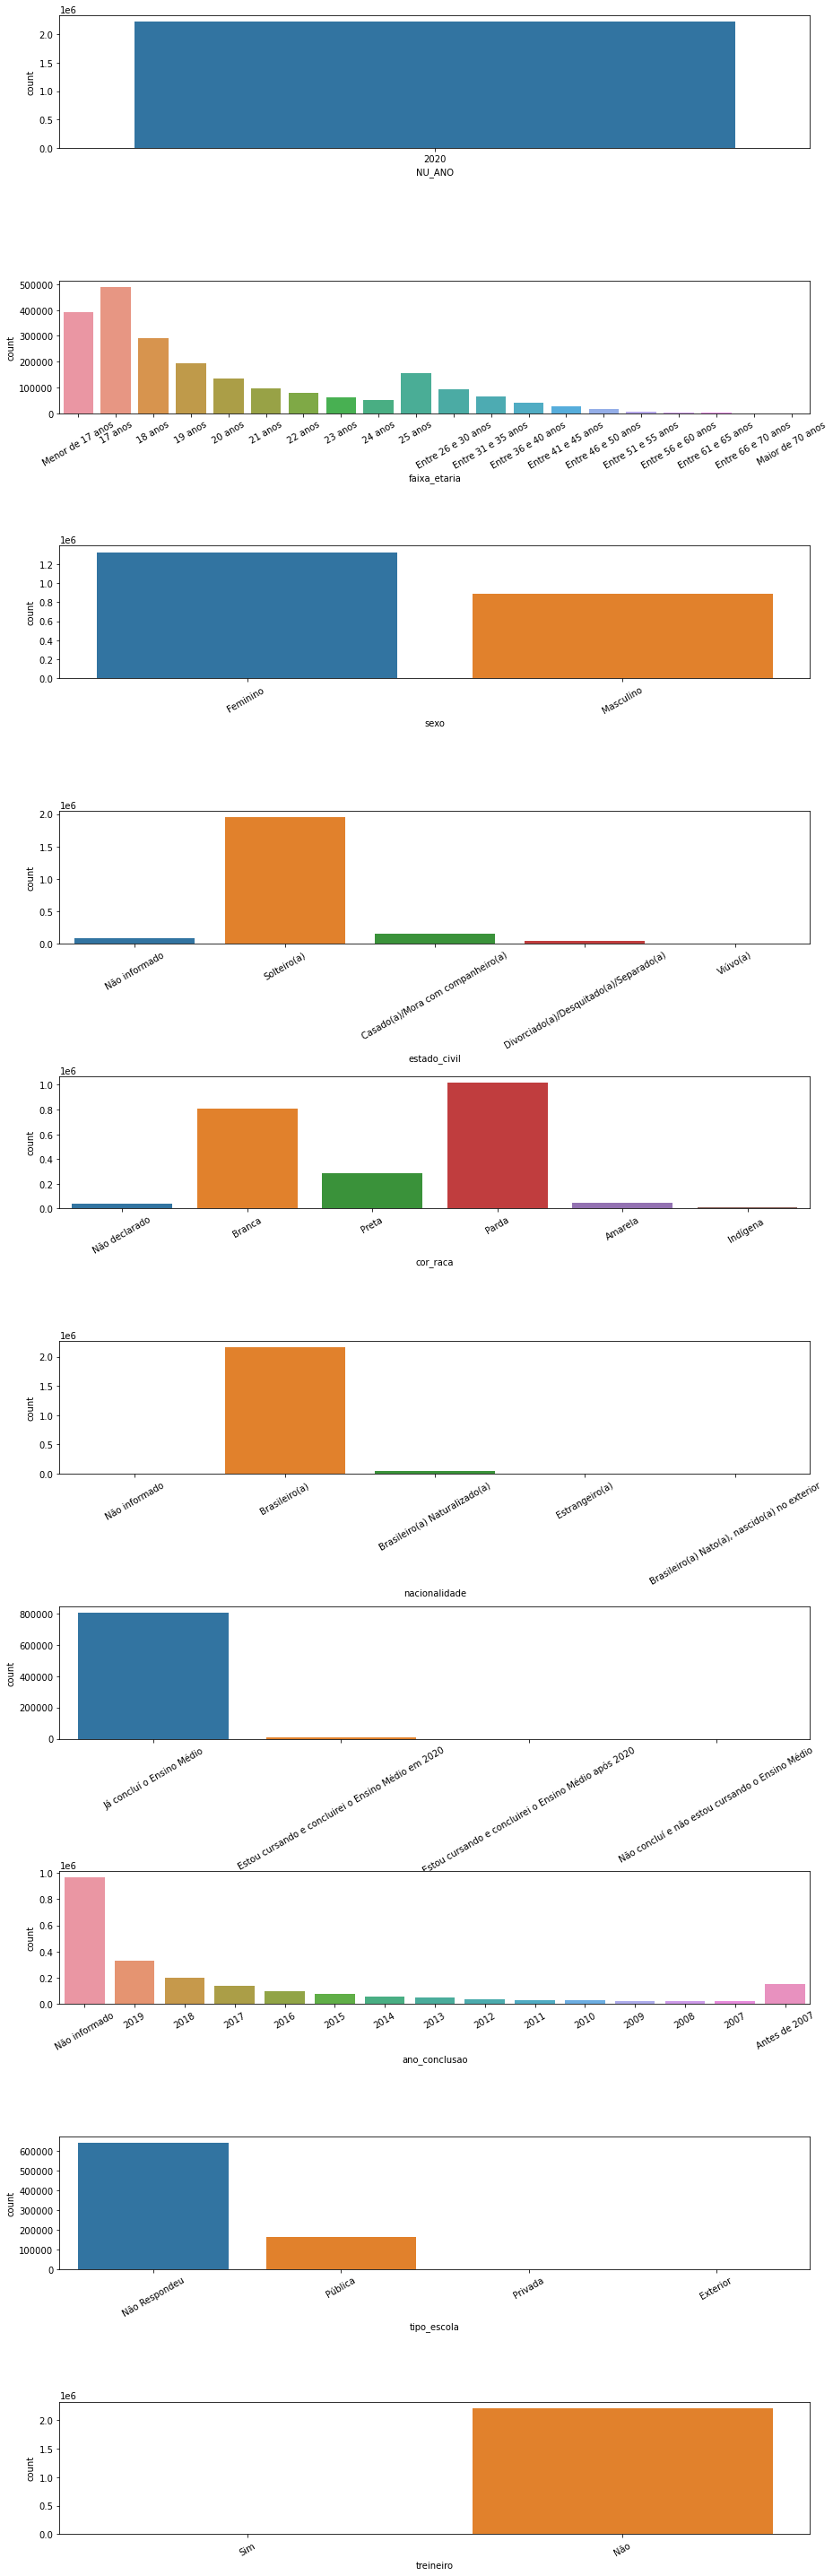

In [45]:
# Agrupamentos e contagens:
dados_faixa_etaria = data.groupby('TP_FAIXA_ETARIA').size().reset_index(name='count')
dados_sexo = data.groupby('TP_SEXO').size().reset_index(name='count')
dados_estado_civil = data.groupby('TP_ESTADO_CIVIL').size().reset_index(name='count')
dados_cor_raca = data.groupby('TP_COR_RACA').size().reset_index(name='count')
dados_nacionalidade = data.groupby('TP_NACIONALIDADE').size().reset_index(name='count')
dados_situacao_conclusao = data.groupby('TP_ST_CONCLUSAO').size().reset_index(name='count')
dados_ano_conclusao = data.groupby('TP_ANO_CONCLUIU').size().reset_index(name='count')
dados_tipo_escola = data.groupby('TP_ESCOLA').size().reset_index(name='count')
dados_treineiro = data.groupby('IN_TREINEIRO').size().reset_index(name='count')


# Configuração do gráfico:
plots = 10
height_per_plot = 5
plot_height = plots * height_per_plot
label_rotation = 30
fig, axs = plt.subplots(plots, figsize=(15, plot_height))
fig.subplots_adjust(bottom = 0.1, hspace=1)

# Plot de cada gráfico:
ax = sns.countplot(x="NU_ANO", data=data, ax=axs[0])

ax = sns.barplot(x=tp_faixa_etaria['faixa_etaria'], y=dados_faixa_etaria['count'], data=dados_faixa_etaria, ax=axs[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_sexo['sexo'], y=dados_sexo['count'], data=dados_sexo, ax=axs[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_estado_civil['estado_civil'], y=dados_estado_civil['count'], data=dados_estado_civil, ax=axs[3])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_cor_raca['cor_raca'], y=dados_cor_raca['count'], data=dados_cor_raca, ax=axs[4])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_nacionalidade['nacionalidade'], y=dados_nacionalidade['count'], data=dados_nacionalidade, ax=axs[5])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_situacao_conclusao['situacao_conclusao'], y=dados_situacao_conclusao['count'], data=dados_situacao_conclusao, ax=axs[6])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_ano_conclusao['ano_conclusao'], y=dados_ano_conclusao['count'], data=dados_ano_conclusao, ax=axs[7])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_tipo_escola['tipo_escola'], y=dados_tipo_escola['count'], data=dados_tipo_escola, ax=axs[8])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_treineiro['treineiro'], y=dados_treineiro['count'], data=dados_treineiro, ax=axs[9])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

***
### Distribuição das informações do Local da Prova

As informações de local da prova cobre as variáveis:
* CO_MUNICIPIO_PROVA (redundante)
* NO_MUNICIPIO_PROVA
* CO_UF_PROVA (redundante)
* SG_UF_PROVA

In [46]:
dados_cod_municipio = data.groupby('CO_MUNICIPIO_PROVA').size().reset_index(name='count').sort_values(['count'], ascending=False)
dados_municipio = data.groupby('NO_MUNICIPIO_PROVA').size().reset_index(name='count').sort_values(['count'], ascending=False)
dados_cod_estado = data.groupby('CO_UF_PROVA').size().reset_index(name='count').sort_values(['count'], ascending=False)
dados_estado = data.groupby('SG_UF_PROVA').size().reset_index(name='count').sort_values(['count'], ascending=False)

print(dados_cod_municipio)
print(dados_cod_municipio['count'].describe())
print("----------------------------------------")

print(dados_municipio)
print(dados_municipio['count'].describe())
print("----------------------------------------")

print(dados_cod_estado)
print(dados_cod_estado['count'].describe())
print("----------------------------------------")

print(dados_estado)
print(dados_estado['count'].describe())
print("----------------------------------------")

      CO_MUNICIPIO_PROVA  count
1313             3550308  85115
1115             3304557  63998
1745             5300108  47456
370              2304400  44380
114              1501402  41242
...                  ...    ...
98               1400159     37
29               1200328     34
35               1200435     31
67               1302108     30
579              2605459     14

[1746 rows x 2 columns]
count     1746.000000
mean      1268.497709
std       4012.332241
min         14.000000
25%        283.000000
50%        499.000000
75%        999.500000
max      85115.000000
Name: count, dtype: float64
----------------------------------------
       NO_MUNICIPIO_PROVA  count
1529            São Paulo  85115
1317       Rio de Janeiro  63998
245              Brasília  47456
574             Fortaleza  44380
204                 Belém  41242
...                   ...    ...
233                Bonfim     37
813                Jordão     34
1369  Santa Rosa do Purus     31
794             

***
### Distribuição das informações da Prova

As informações da prova cobre as variáveis:
* CO_PROVA_CN
* CO_PROVA_CH
* CO_PROVA_LC
* CO_PROVA_MT
* TP_LINGUA

[Text(0, 0, 'Inglês'), Text(1, 0, 'Espanhol')]

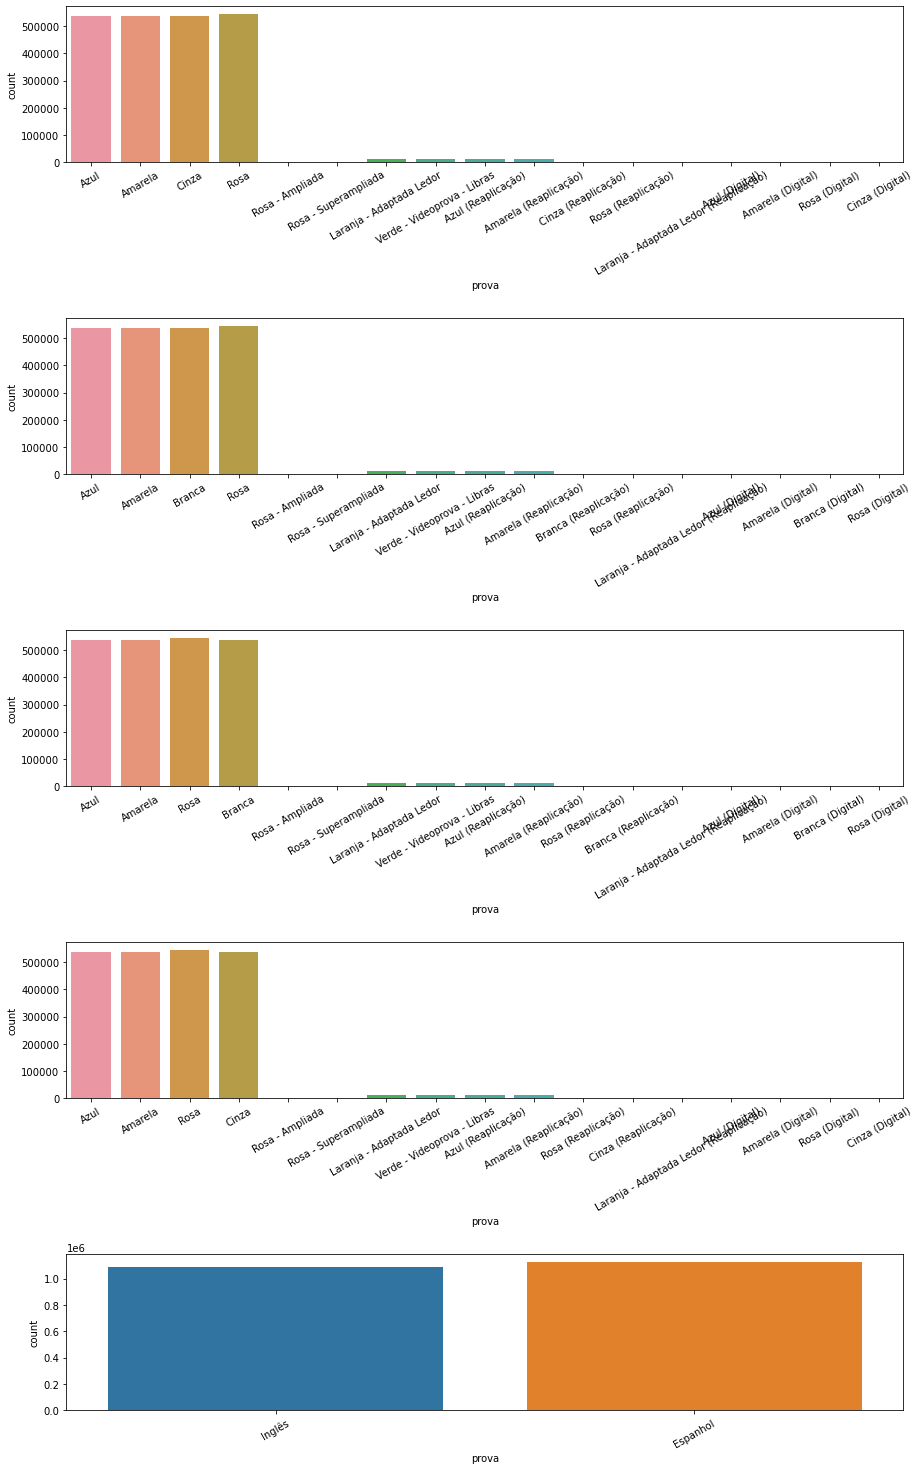

In [47]:
# Agrupamentos e contagens:
dados_prova_cn = data.groupby('CO_PROVA_CN').size().reset_index(name='count')
dados_prova_ch = data.groupby('CO_PROVA_CH').size().reset_index(name='count')
dados_prova_lc = data.groupby('CO_PROVA_LC').size().reset_index(name='count')
dados_prova_mt = data.groupby('CO_PROVA_MT').size().reset_index(name='count')
dados_lingua = data.groupby('TP_LINGUA').size().reset_index(name='count')


# Configuração do gráfico:
plots = 5
height_per_plot = 5
plot_height = plots * height_per_plot
label_rotation = 30
fig, axs = plt.subplots(plots, figsize=(15, plot_height))
fig.subplots_adjust(bottom = 0.1, hspace=1)

# Plot de cada gráfico:
#ax = sns.countplot(x="NU_ANO", data=data, ax=axs[0])

ax = sns.barplot(x=co_prova_cn['prova'], y=dados_prova_cn['count'], data=dados_prova_cn, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=co_prova_ch['prova'], y=dados_prova_ch['count'], data=dados_prova_ch, ax=axs[1])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=co_prova_lc['prova'], y=dados_prova_lc['count'], data=dados_prova_lc, ax=axs[2])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=co_prova_mt['prova'], y=dados_prova_mt['count'], data=dados_prova_mt, ax=axs[3])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.barplot(x=tp_lingua['prova'], y=dados_lingua['count'], data=dados_lingua, ax=axs[4])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

***
### Distribuição das informações detalhadas das notas de redação

As informações de estudo cobre as variáveis:
* Categóricas
    * TP_STATUS_REDACAO
* Numéricas
    * NU_NOTA_COMP1
    * NU_NOTA_COMP2
    * NU_NOTA_COMP3
    * NU_NOTA_COMP4
    * NU_NOTA_COMP5
    * NU_NOTA_REDACAO

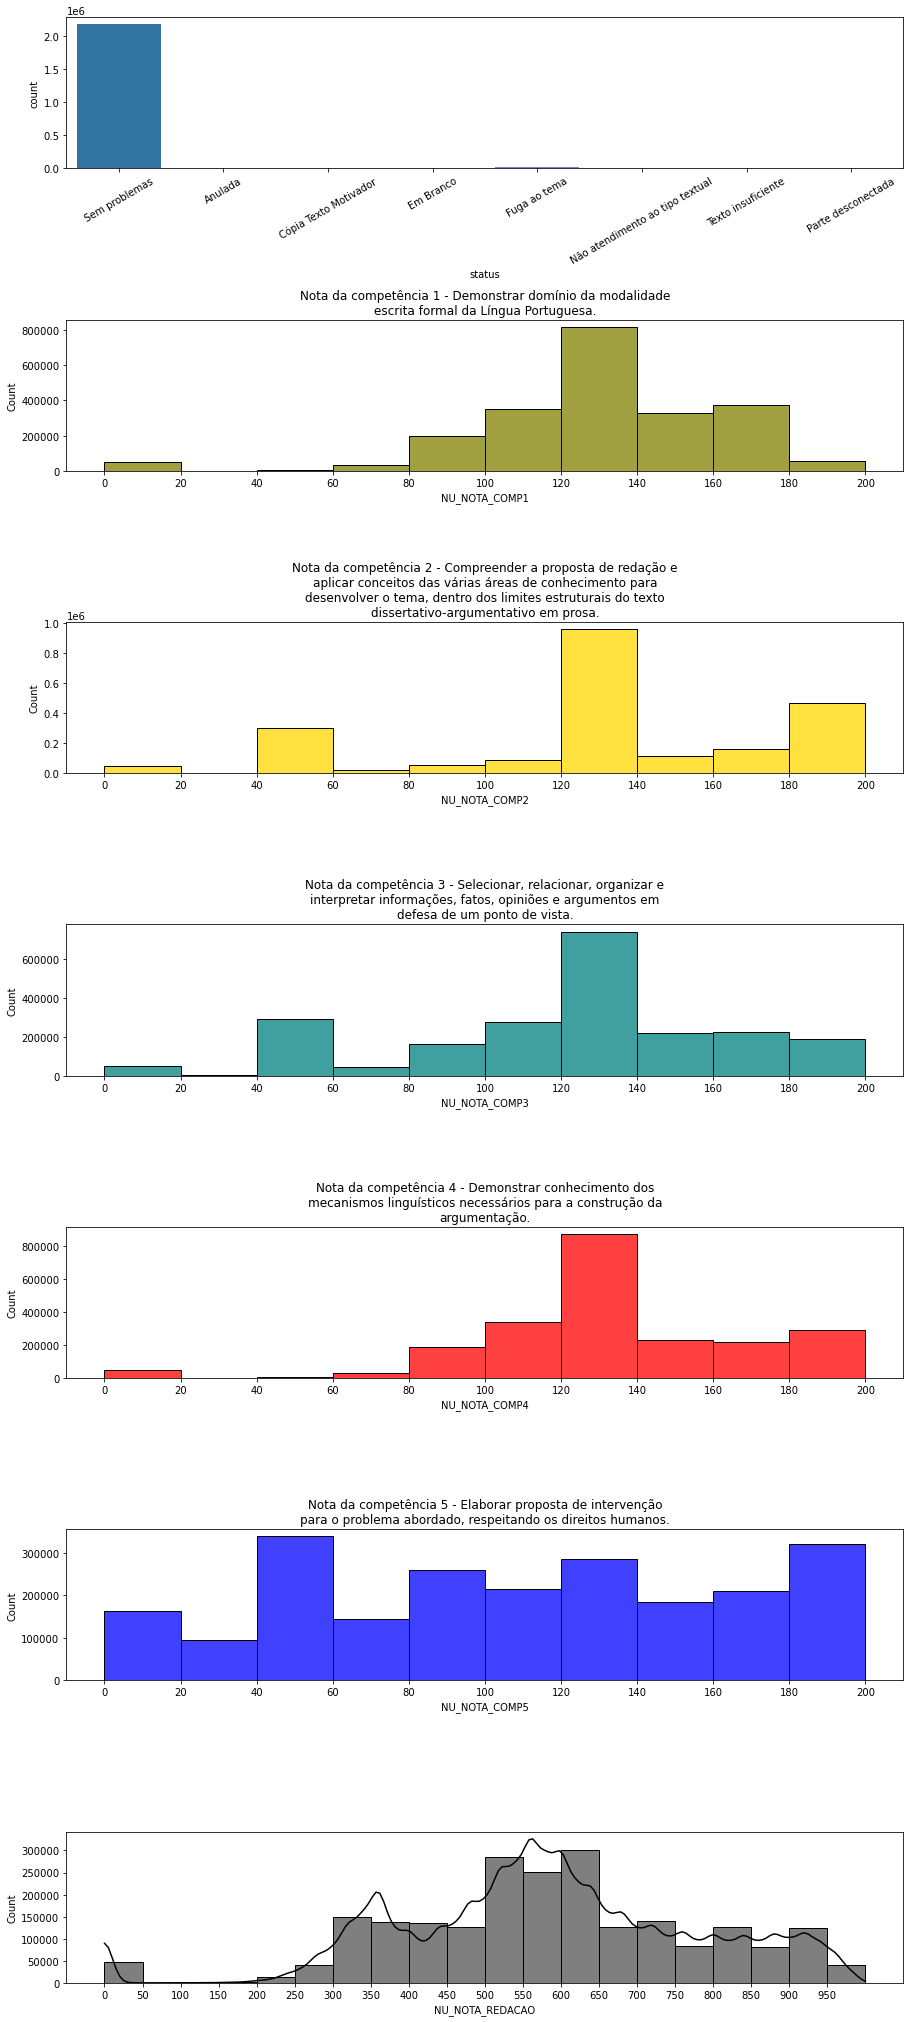

In [48]:
# tp_status_redacao

# Agrupamentos e contagens:
dados_status_redacao = data.groupby('TP_STATUS_REDACAO').size().reset_index(name='count')
dados_nota_comp1 = data.groupby('NU_NOTA_COMP1').size().reset_index(name='count')
#PrintAll(dados_nota_comp1)

# Configuração do gráfico:
plots = 7
height_per_plot = 5
plot_height = plots * height_per_plot
label_rotation = 30
fig, axs = plt.subplots(plots, figsize=(15, plot_height))
fig.subplots_adjust(bottom = 0.1, hspace=1)

# Plot de cada gráfico:

ax = sns.barplot(x=tp_status_redacao['status'], y=dados_status_redacao['count'], data=dados_status_redacao, ax=axs[0])
ax.set_xticklabels(ax.get_xticklabels(),rotation = label_rotation)

ax = sns.histplot(data, x="NU_NOTA_COMP1", binwidth=20, color="olive", ax=axs[1])
ax.set_xticks(np.arange(0, 220, 20))
#ax.set_title(competencias_redacao.iloc[0]['competencia'])
ax.set_title("\n".join(wrap(f"{competencias_redacao.iloc[0]['competencia']}", 60)))

ax = sns.histplot(data, x="NU_NOTA_COMP2", binwidth=20, color="gold", ax=axs[2])
ax.set_xticks(np.arange(0, 220, 20))
ax.set_title("\n".join(wrap(f"{competencias_redacao.iloc[1]['competencia']}", 60)))

ax = sns.histplot(data, x="NU_NOTA_COMP3", binwidth=20, color="teal", ax=axs[3])
ax.set_xticks(np.arange(0, 220, 20))
ax.set_title("\n".join(wrap(f"{competencias_redacao.iloc[2]['competencia']}", 60)))

ax = sns.histplot(data, x="NU_NOTA_COMP4", binwidth=20, color="red", ax=axs[4])
ax.set_xticks(np.arange(0, 220, 20))
ax.set_title("\n".join(wrap(f"{competencias_redacao.iloc[3]['competencia']}", 60)))

ax = sns.histplot(data, x="NU_NOTA_COMP5", binwidth=20, color="blue", ax=axs[5])
ax.set_xticks(np.arange(0, 220, 20))
ax.set_title("\n".join(wrap(f"{competencias_redacao.iloc[4]['competencia']}", 60)))

ax = sns.histplot(data, x="NU_NOTA_REDACAO", binwidth=50, kde=True, color="black", ax=axs[6])
ax.set_xticks(np.arange(0, 1000, 50))

***
### Distribuição das informações socioeconômicas

Colocar quais são as perguntas<br>

As informações de estudo cobre as variáveis:
* Categóricas
    * Q001
    * Q002
    * Q003
    * Q004
    * Q005
    * Q006
    * Q007
    * Q008
    * Q009
    * Q010
    * Q011
    * Q012
    * Q014
    * Q015
    * Q016
    * Q017
    * Q018
    * Q019
    * Q020
    * Q021
    * Q022
    * Q023
    * Q024
    * Q025

****
#### Explorando as questões Q001 e Q002

Q001 -> Até que série seu pai, ou o homem responsável por você, estudou?<br>
Q002 -> Até que série sua mãe, ou a mulher responsável por você, estudou?<br>

As respostas possíveis são:

A -> Nunca estudou.<br>
B -> Não completou a 4ª série/5º ano do Ensino Fundamental.<br>
C -> Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.<br>
D -> Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.<br>
E -> Completou o Ensino Médio, mas não completou a Faculdade.<br>
F -> Completou a Faculdade, mas não completou a Pós-graduação.<br>
G -> Completou a Pós-graduação.<br>
H -> Não sei.<br>

Em um primeiro ponto, olharemos para a correlação das notas, usando a resposta do Q001 e Q002 como terceira dimensão, colocando cor de forma a poder identificar se existe algum padrão de notas crescendo de acordo com a escolaridade dos pais.


2022-07-14 22:27:44.851317 - Started
2022-07-14 22:28:40.441699 - Finished


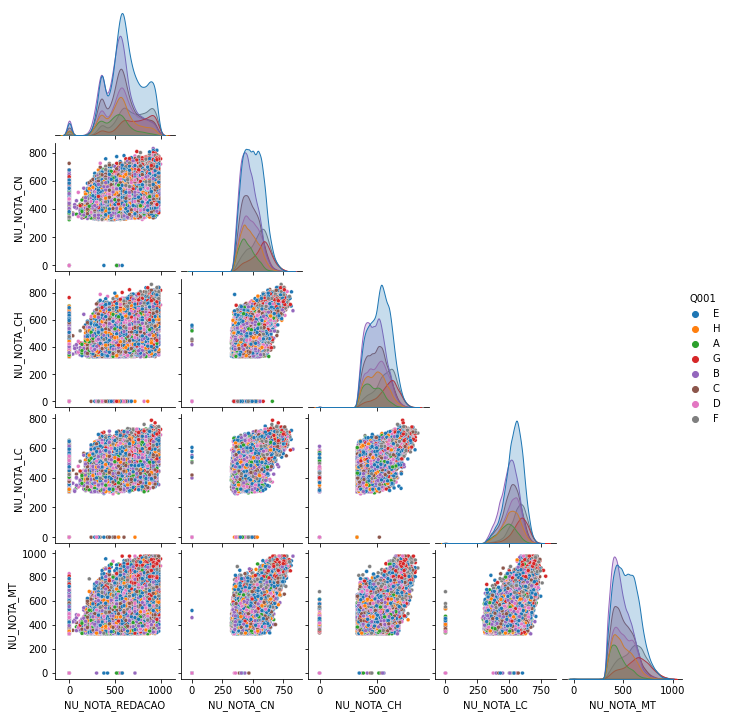

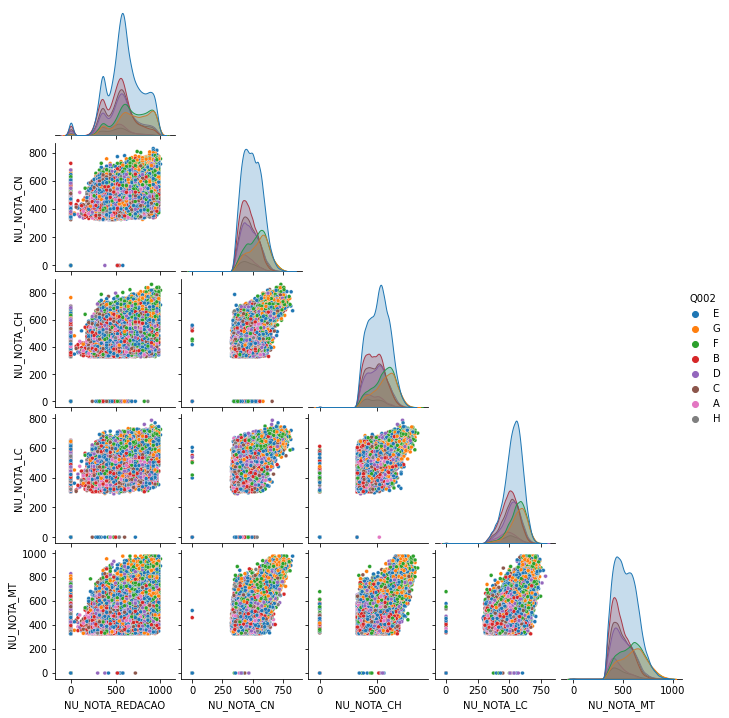

In [49]:
# Dado que o processamento para gerar o gráfico com todas as linhas foi gigante, utilizamos uma amostra de XX% dos dados:

print(f"{datetime.now()} - Started")
data_sample = data.sample(frac=0.05)

# [Dúvida] -> Como ajustar os eixos X e Y para serem iguais e comparáveis.

# Q001:
x = sns.pairplot(data_sample[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001', plot_kws={"s":15}, corner=True, kind='scatter')
x.fig.set_size_inches(10,10)

# Q002:
x = sns.pairplot(data_sample[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q002']], hue='Q002', plot_kws={"s":15}, corner=True)
x.fig.set_size_inches(10,10)

print(f"{datetime.now()} - Finished")

Como são muitas categorias diferentes, o gráfico fica de difícil leitura e é complicado conseguir entender um padrão.<br>
Para fins de teste, pegamos duas das categorias mais opostas e geramos o mesmo gráfico para verificar se existe uma diferença mais clara.

2022-07-14 22:29:04.954439 - Started
2022-07-14 22:33:37.591208 - Finished


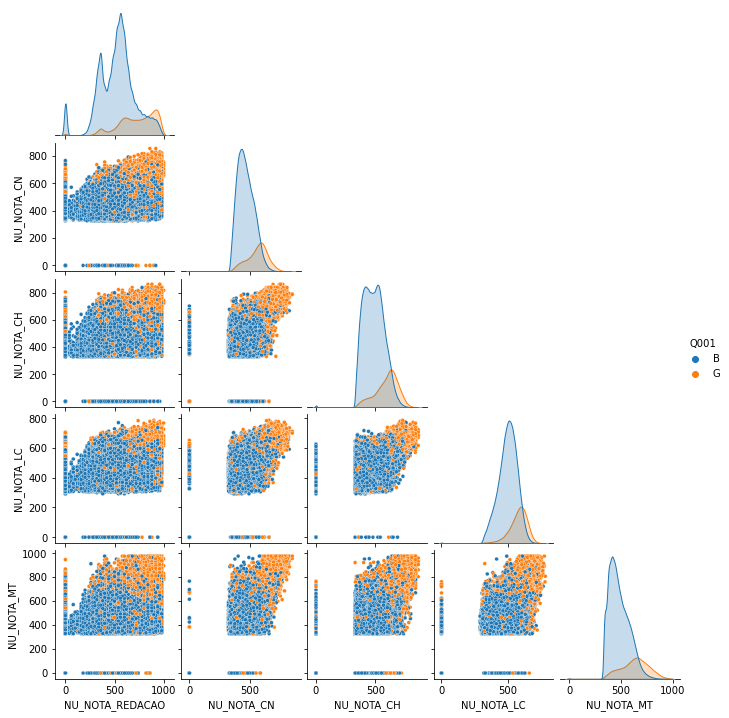

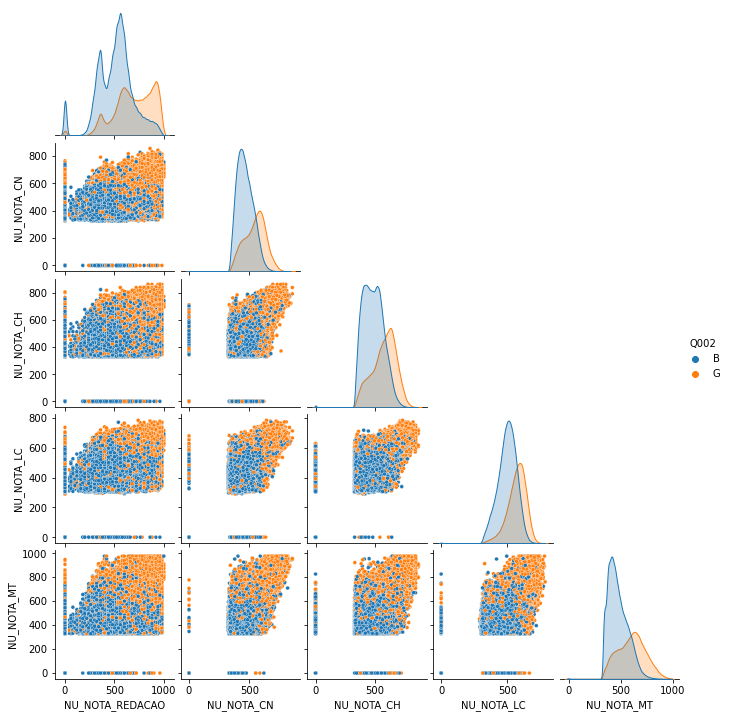

In [50]:
# Dado que o processamento para gerar o gráfico com todas as linhas foi gigante, utilizamos uma amostra de XX% dos dados:

print(f"{datetime.now()} - Started")

# [Dúvida] -> Como ajustar os eixos X e Y para serem iguais e comparáveis.

# Q001:
data_filtered = data[(data['Q001'] == 'B') | (data['Q001'] == 'G')]
x = sns.pairplot(data_filtered[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001', plot_kws={"s":15}, corner=True)
x.fig.set_size_inches(10,10)

# Q002:
data_filtered = data[(data['Q002'] == 'B') | (data['Q002'] == 'G')]
x = sns.pairplot(data_filtered[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q002']], hue='Q002', plot_kws={"s":15}, corner=True)
x.fig.set_size_inches(10,10)

print(f"{datetime.now()} - Finished")


Como é possível verificar acima, existe uma clara diferença no resultado de qualquer par de notas se levarmos em conta a situação do ensino dos pais dos candidatos. <br>
Candidatos com pais mais instruidos tendem a ter resultados melhores nas notas.<br>

Outra forma de visualizar o quanto as diferentes respostas impactam a nota, seria gerar um gráfico de boxplot para cada uma das respostas, levando em conta a distribuição de média das notas ("NU_NOTA_AVG").

<AxesSubplot:xlabel='Q001', ylabel='count'>

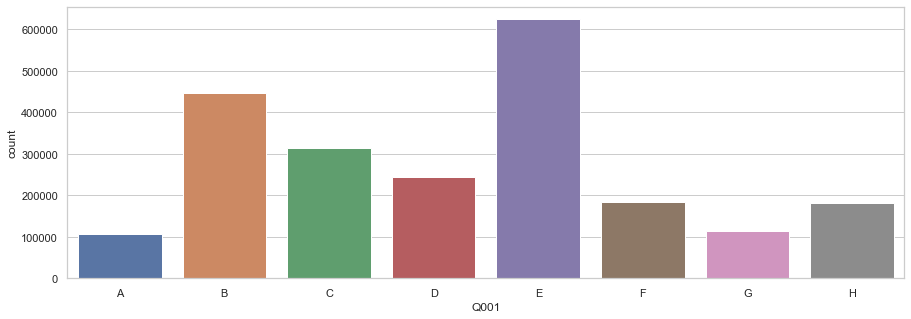

In [51]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q001", data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

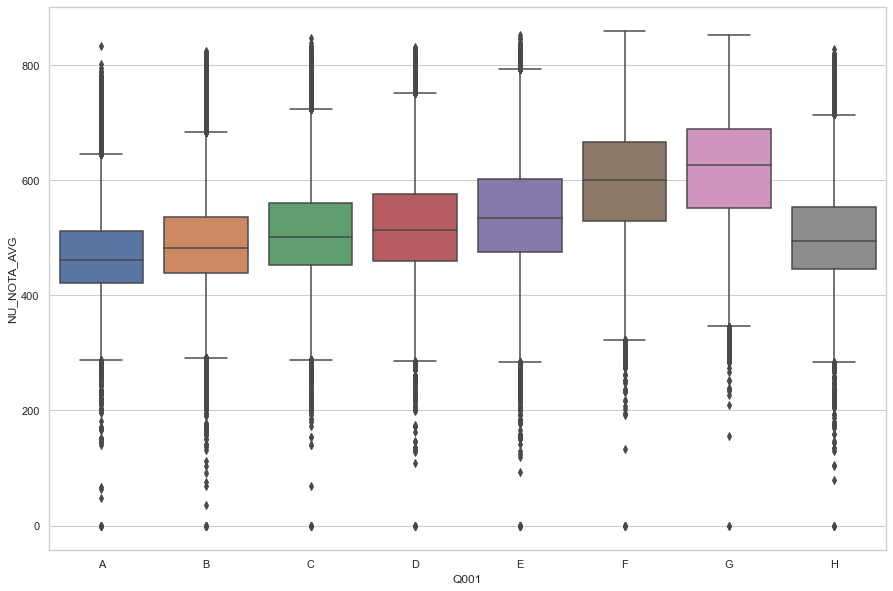

In [52]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q001', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

<AxesSubplot:xlabel='Q002', ylabel='count'>

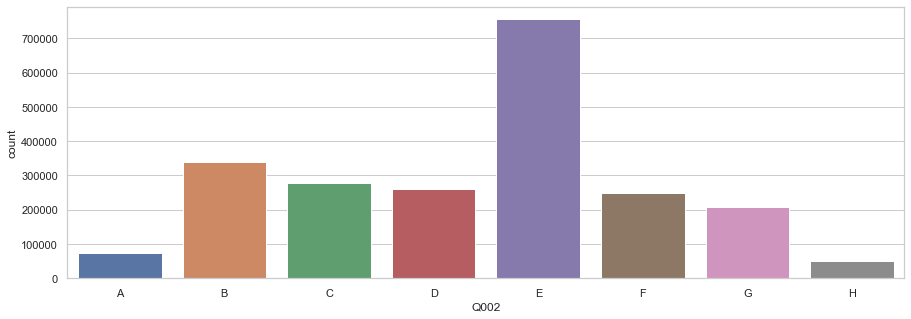

In [53]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q002", data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

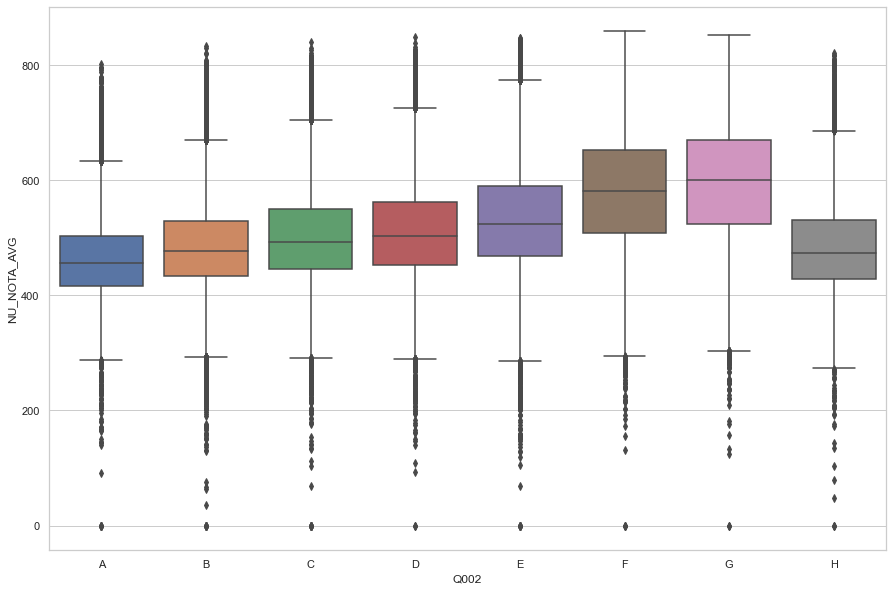

In [54]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q002', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

Novamente é possível notar este comportamento, agora mais detalhado. As categorias de respostas F e G, respectivamente, pais com ensino superior e pais com pós-graduação tem os melhores resultados. No outro extremo, pais que nunca estudaram ou que não completaram o ensino fundamental.<br>

****
#### Explorando as questões Q003 e Q004

Q003 -> A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você. (Se ele não estiver trabalhando, escolha uma ocupação pensando no último trabalho dele).<br>
Q004 -> A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você. (Se ela não estiver trabalhando, escolha uma ocupação pensando no último trabalho dela).<br>

As respostas possíveis são:

A -> Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.<br>
B -> Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.<br>
C -> Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.<br>
D -> Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.<br>
E -> Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.<br>
F -> Não sei.<br>

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q003', ylabel='count'>

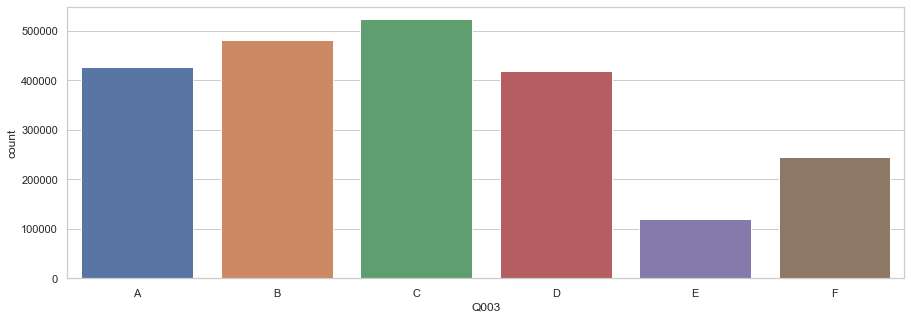

In [55]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q003", data=data, order=['A', 'B', 'C', 'D', 'E', 'F'])

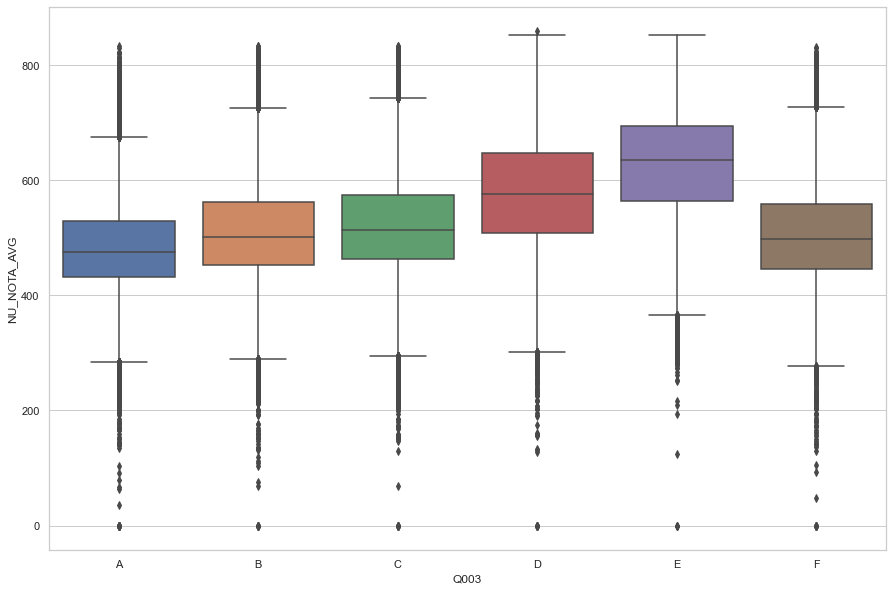

In [56]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q003', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F'])

<AxesSubplot:xlabel='Q004', ylabel='count'>

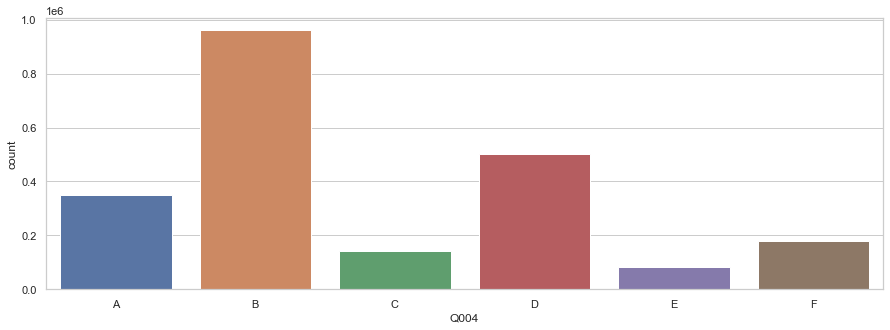

In [57]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q004", data=data, order=['A', 'B', 'C', 'D', 'E', 'F'])

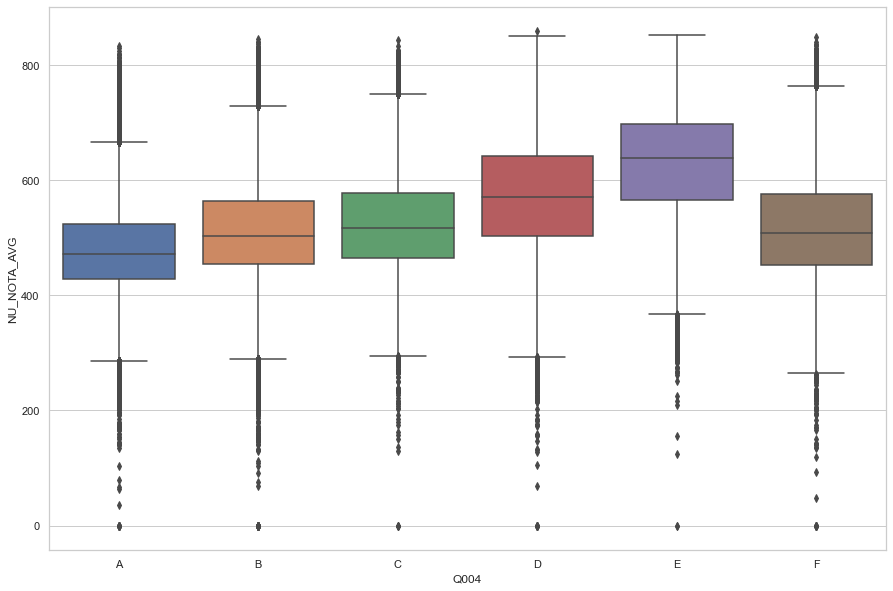

In [58]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q004', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F'])

Esta questão tem comportamento parecido com o do grau de instrução dos pais. Estas 4 variáveis parecem indicar um padrão em relação a um "sucesso" dos pais.
Visto que é plausível imaginar que os pais que tem pós-graduação também são os que se encontram nos dois grupos de trabalhos com maior requisitos de estudos (D e E).

****
#### Explorando a questão Q005

Q005 -> Incluindo você, quantas pessoas moram atualmente em sua residência?<br>

As respostas possíveis variam em números inteiros representado quantidades que vão de 1 a 20.

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q005', ylabel='count'>

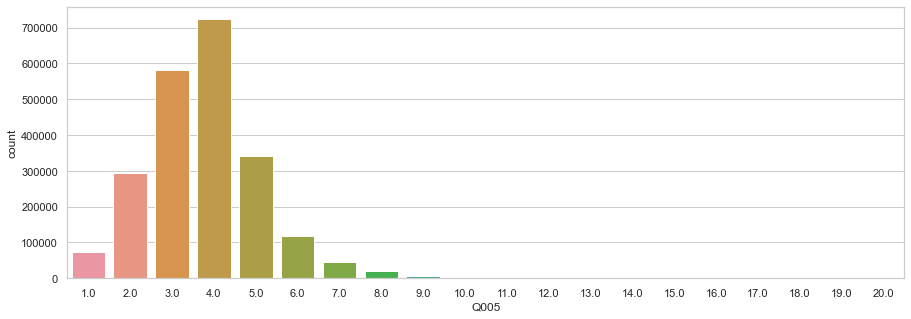

In [59]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q005", data=data)

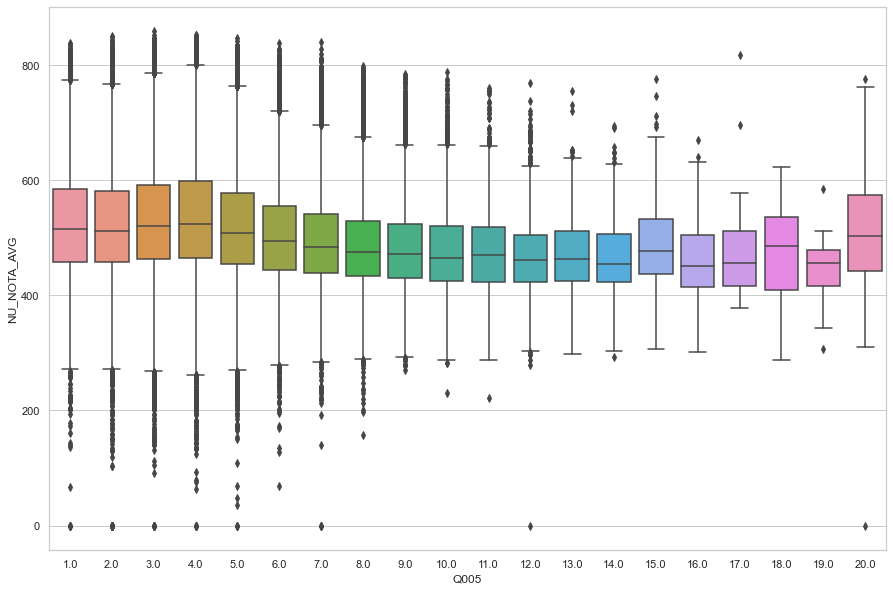

In [60]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q005', y='NU_NOTA_AVG', data=data)

Este caso mostra um padrão (média, mediana e max) melhor de notas em domicílios com menos pessoas.<br>

****
#### Explorando a questão Q006

Q006 -> Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)<br>
```
A -> Nenhuma Renda
B -> Até R$ 1.045,00
C -> De R$ 1.045,01 até R$ 1.567,50
D -> De R$ 1.567,51 até R$ 2.090,00
E -> De R$ 2.090,01 até R$ 2.612,50
F -> De R$ 2.612,51 até R$ 3.135,00
G -> De R$ 3.135,01 até R$ 4.180,00
H -> De R$ 4.180,01 até R$ 5.225,00
I -> De R$ 5.225,01 até R$ 6.270,00
J -> De R$ 6.270,01 até R$ 7.315,00
K -> De R$ 7.315,01 até R$ 8.360,00
L -> De R$ 8.360,01 até R$ 9.405,00
M -> De R$ 9.405,01 até R$ 10.450,00
N -> De R$ 10.450,01 até R$ 12.540,00
O -> De R$ 12.540,01 até R$ 15.675,00
P -> De R$ 15.675,01 até R$ 20.900,00, order=['A', 'B', 'C', 'D'])
Q -> Acima de R$ 20.900,00
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


In [61]:
#fig, axs = plt.subplots(2, figsize=(15, 15))
#fig.subplots_adjust(bottom = 0.1, hspace=1)
#sns.countplot(x="Q006", data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax=axs[0])
#sns.boxplot(x='Q006', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'], ax=axs[1])

<AxesSubplot:xlabel='Q006', ylabel='count'>

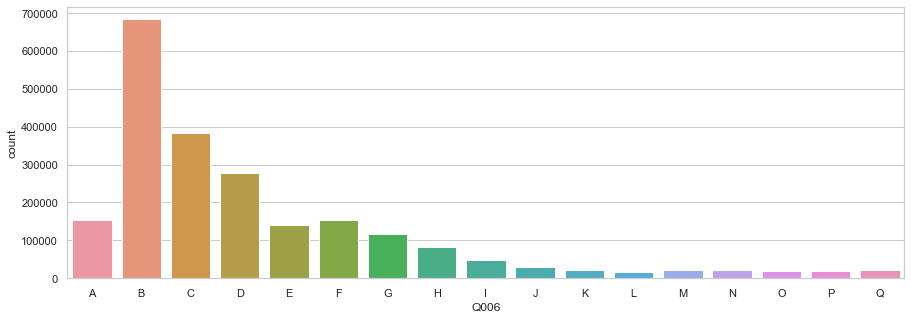

In [62]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q006", data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

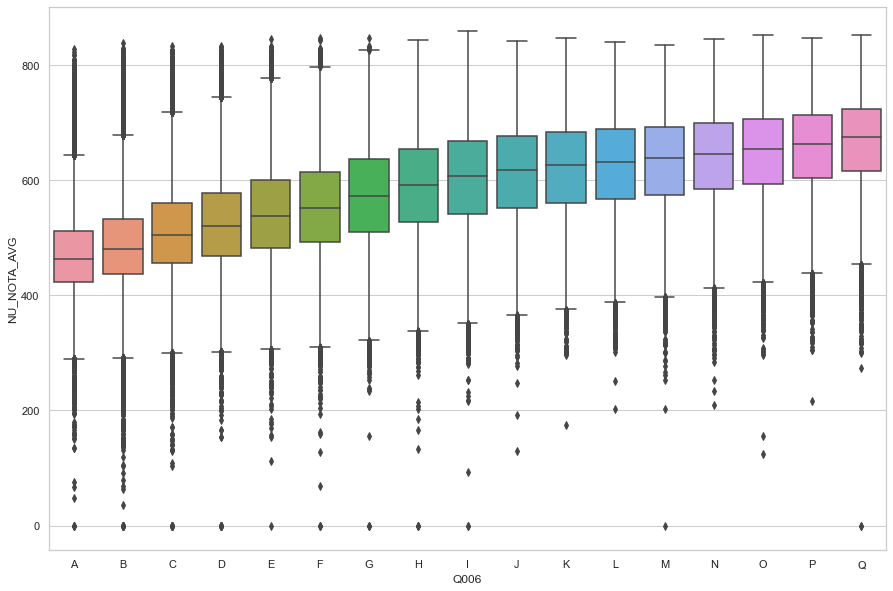

In [63]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q006', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q'])

A renda familiar parece influenciar bastante no desempenho dos candidatos, levando a média de menos de 450 pontos para famílias sem renda, para cerca de 600 para famílias com renda até R$6200,00.<br>
O resultado condiz com a ideia de Pirâmide de Maslow, sem renda ou com pouca renda, é bem provável que estes candidatos tenham outras preocupações maiores no dia cotidiano do que ir bem em uma prova.

****
#### Explorando a questão Q007

Q007 -> Em sua residência trabalha empregado(a) doméstico(a)?<br>

```
A -> Não.
B -> Sim, um ou dois dias por semana.
C -> Sim, três ou quatro dias por semana.
D -> Sim, pelo menos cinco dias por semana.
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q007', ylabel='count'>

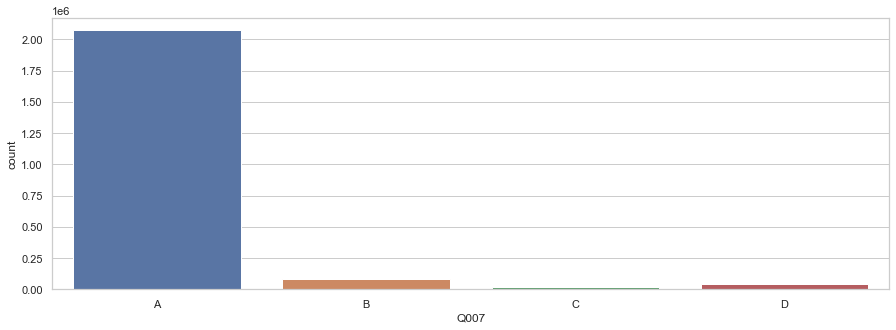

In [64]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q007", data=data, order=['A', 'B', 'C', 'D'])

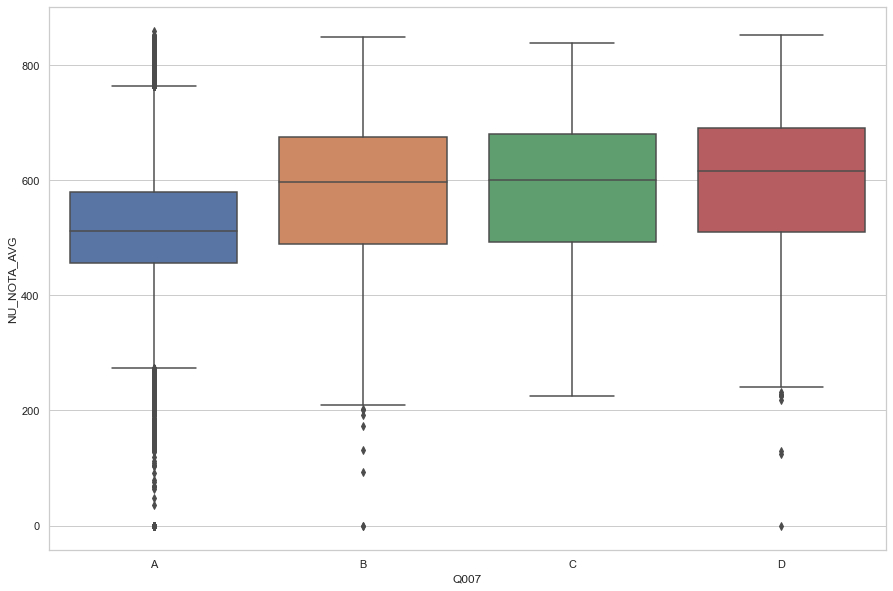

In [65]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
x = sns.boxplot(x='Q007', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D'])

Parece refletir o mesmo comportamento de renda.

****
#### Explorando a questão Q008

Q008 -> Na sua residência tem banheiro?<br>

```
A -> Não.
B -> Sim, um.
C -> Sim, dois.
D -> Sim, três.
E -> Sim, quatro ou mais.
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q008', ylabel='count'>

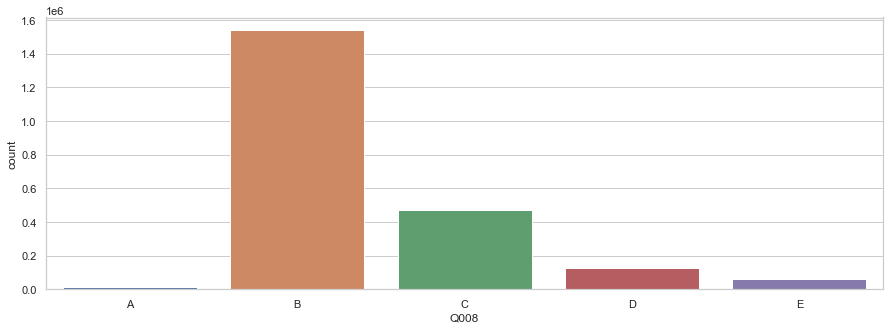

In [66]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q008", data=data, order=['A', 'B', 'C', 'D', 'E'])

<AxesSubplot:xlabel='Q008', ylabel='NU_NOTA_AVG'>

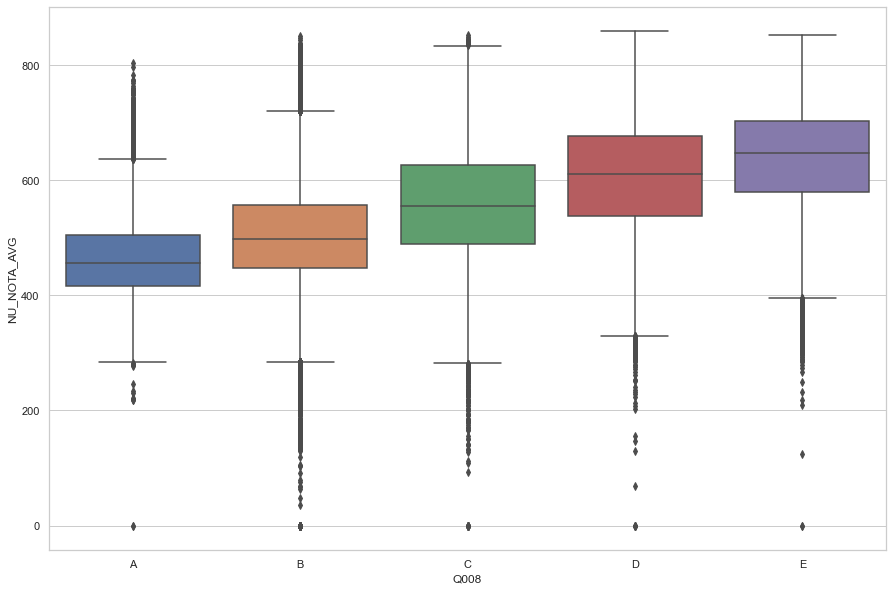

In [67]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='Q008', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E'])

****
#### Explorando a questão Q009

Q009 -> Na sua residência tem quartos para dormir?<br>

```
A -> Não.
B -> Sim, um.
C -> Sim, dois.
D -> Sim, três.sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q008", data=data, order=['A', 'B', 'C', 'D', 'E'])
E -> Sim, quatro ou mais.
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q009', ylabel='count'>

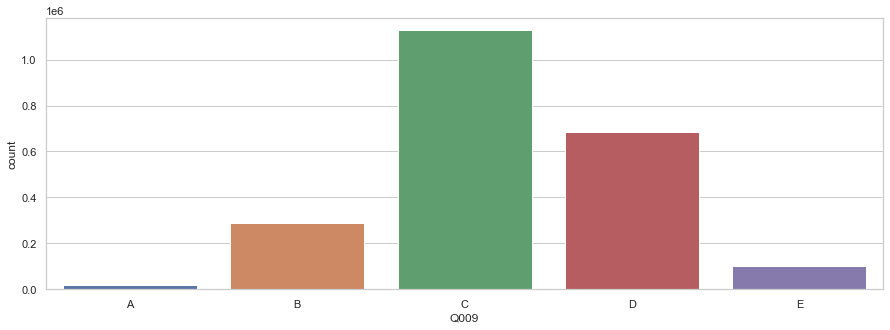

In [68]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q009", data=data, order=['A', 'B', 'C', 'D', 'E'])

<AxesSubplot:xlabel='Q009', ylabel='NU_NOTA_AVG'>

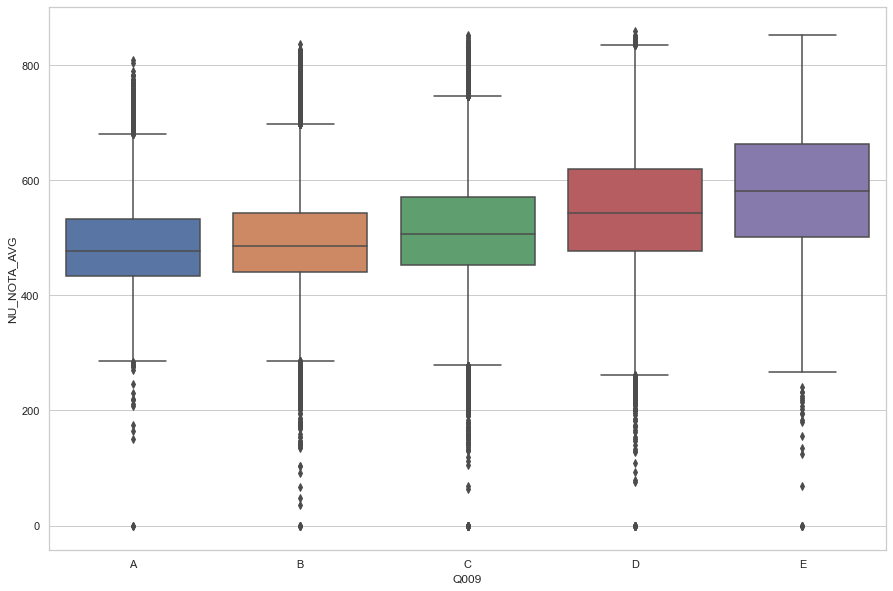

In [69]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='Q009', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E'])

****
#### Explorando a questão Q010

Q010 -> Na sua residência tem carro?<br>

```
A -> Não.
B -> Sim, um.
C -> Sim, dois.
D -> Sim, três.
E -> Sim, quatro ou mais.
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q010', ylabel='count'>

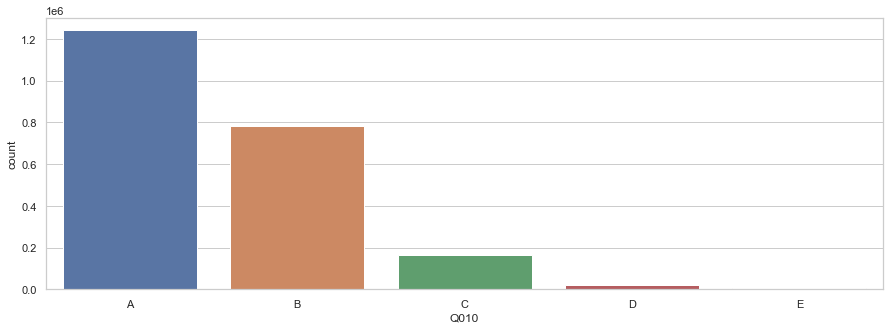

In [70]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q010", data=data, order=['A', 'B', 'C', 'D', 'E'])

<AxesSubplot:xlabel='Q010', ylabel='NU_NOTA_AVG'>

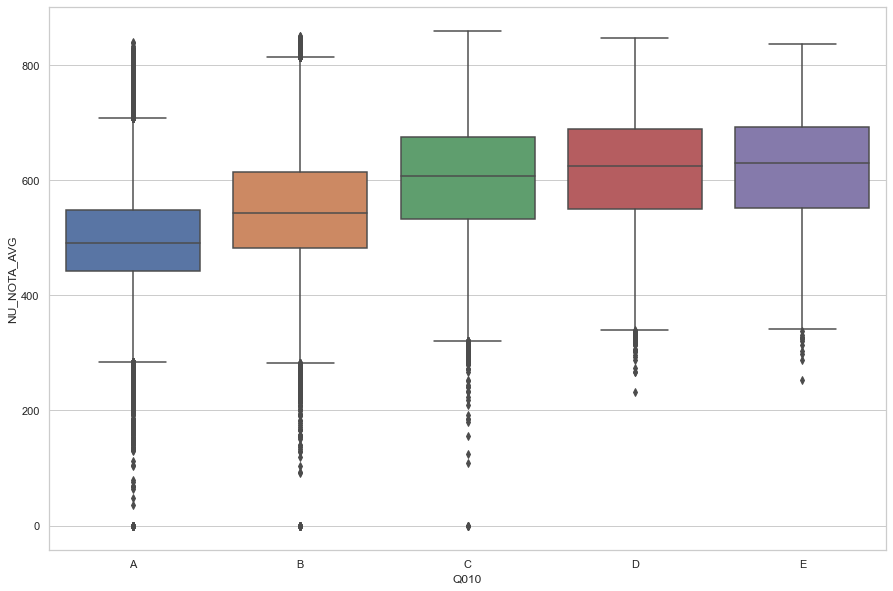

In [71]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='Q010', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E'])

****
#### Explorando a questão Q024

Q024 -> Na sua residência tem computador?<br>

```
A -> Não.
B -> Sim, um.
C -> Sim, dois.
D -> Sim, três.
E -> Sim, quatro ou mais.
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q024', ylabel='count'>

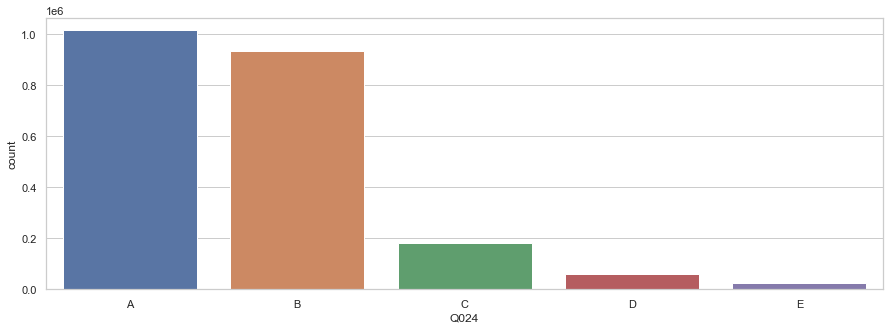

In [72]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q024", data=data, order=['A', 'B', 'C', 'D', 'E'])

<AxesSubplot:xlabel='Q024', ylabel='NU_NOTA_AVG'>

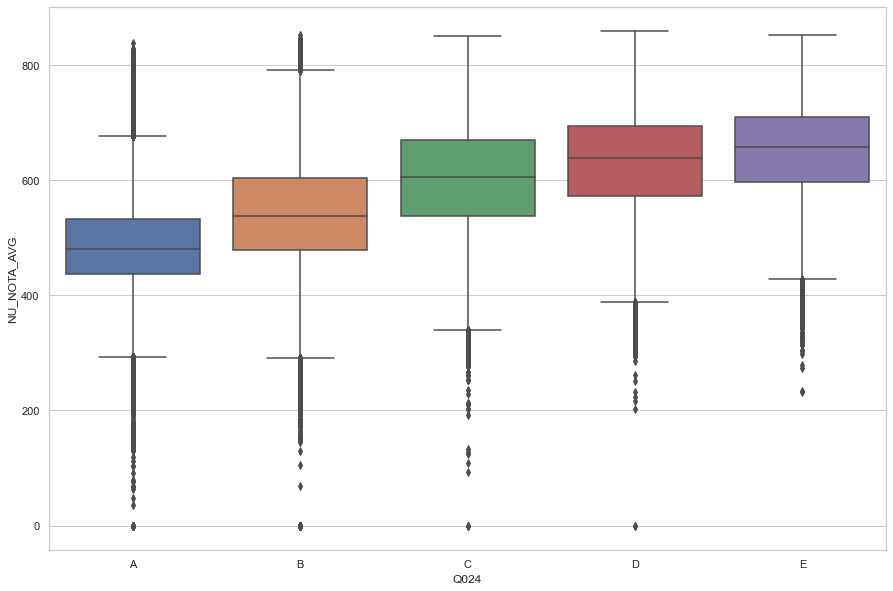

In [73]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='Q024', y='NU_NOTA_AVG', data=data, order=['A', 'B', 'C', 'D', 'E'])

****
#### Explorando a questão Q025

Q025 -> Na sua residência tem acesso à Internet?<br>

```
A -> Não.
B -> Sim
```

Vamos olhar para a distribuição das notas baseado em cada categoria de resposta.


<AxesSubplot:xlabel='Q025', ylabel='count'>

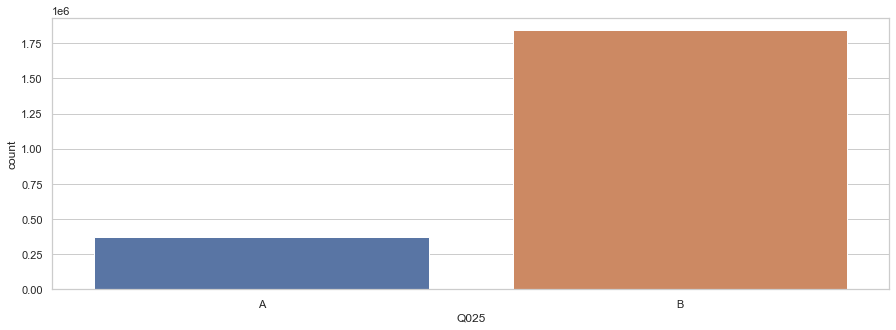

In [74]:
sns.set(rc={'figure.figsize':(15,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="Q025", data=data, order=['A', 'B'])

<AxesSubplot:xlabel='Q025', ylabel='NU_NOTA_AVG'>

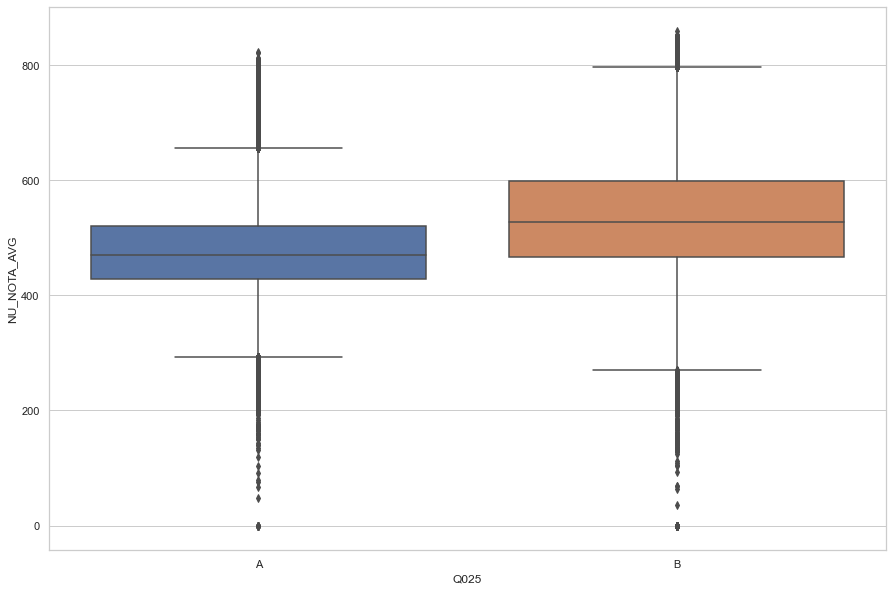

In [75]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='Q025', y='NU_NOTA_AVG', data=data, order=['A', 'B'])

***
### Distribuição das notas por estado


Verificamos também os dados das médias das notas por estado de forma a ser possível verificar se alguns estados tem resultados melhores do que outros.

In [76]:
data_por_estado = data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].describe()
data_por_estado

,count,mean,std,min,25%,50%,75%,max
SG_UF_PROVA,,,,,,,,
AC,16834.0,491.027081,77.978561,0.00,436.310,480.48,536.895,789.36
AL,45755.0,503.974602,87.159637,0.00,441.900,491.08,555.400,829.38
AM,45596.0,492.090207,76.197721,105.86,443.555,486.46,534.920,814.92
AP,17646.0,488.024366,78.537067,0.00,435.560,477.75,532.320,790.58
BA,181630.0,508.506365,87.611742,0.00,445.120,495.86,562.800,844.90
CE,130162.0,519.574271,96.243991,0.00,450.085,508.86,582.460,851.50
DF,47456.0,538.699658,94.814261,156.20,468.180,528.66,602.905,844.30
ES,39921.0,539.292367,94.363272,149.80,469.660,529.96,603.000,836.02
GO,72821.0,528.106676,94.757478,0.00,457.960,514.92,590.580,841.90


In [77]:
# Ordenamento dos estados por mediana das notas. Será usado para gerar o gráfico de boxplot ordenando os estados.
median_nota_estado_ordenado = data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].median().reset_index(name='median').sort_values(by='median', ascending=False)
PrintAll(median_nota_estado_ordenado)

   SG_UF_PROVA  median
25          SP  546.28
10          MG  542.22
23          SC  539.66
17          PR  534.95
18          RJ  534.86
7           ES  529.96
22          RS  528.88
6           DF  528.66
8           GO  514.92
19          RN  510.70
5           CE  508.86
15          PE  508.32
11          MS  506.44
24          SE  502.20
12          MT  500.82
14          PB  499.76
4           BA  495.86
21          RR  492.75
20          RO  491.38
1           AL  491.08
16          PI  489.00
2           AM  486.46
13          PA  486.34
26          TO  486.28
0           AC  480.48
9           MA  479.92
3           AP  477.75


In [78]:
avg_nota_estado_ordenado = data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].mean().reset_index(name='average').sort_values(by='average', ascending=False)
PrintAll(avg_nota_estado_ordenado)

   SG_UF_PROVA  average
25          SP  552.757
10          MG  550.627
23          SC  547.371
17          PR  543.113
18          RJ  542.638
7           ES  539.292
6           DF  538.700
22          RS  538.275
8           GO  528.107
19          RN  522.129
5           CE  519.574
11          MS  518.447
15          PE  518.271
24          SE  516.027
14          PB  512.465
12          MT  511.965
4           BA  508.506
21          RR  504.854
16          PI  504.685
1           AL  503.975
20          RO  500.982
26          TO  500.366
13          PA  497.785
9           MA  492.794
2           AM  492.090
0           AC  491.027
3           AP  488.024


<AxesSubplot:xlabel='SG_UF_PROVA', ylabel='count'>

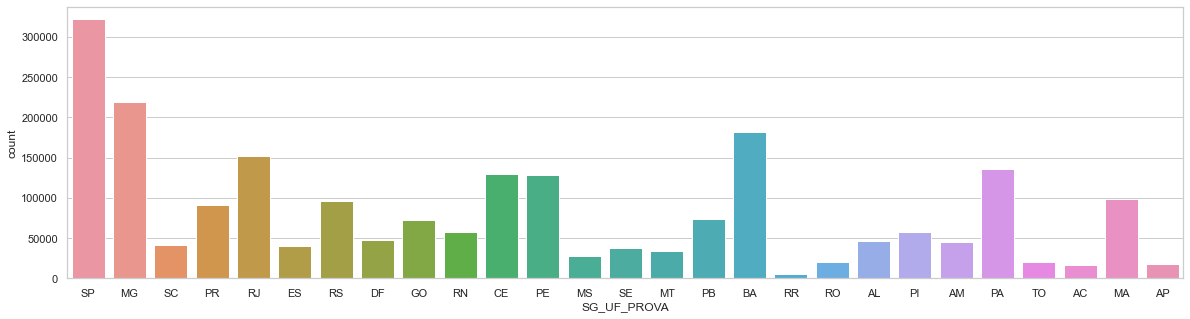

In [79]:
sns.set(rc={'figure.figsize':(20,5)}, font_scale=1, style='whitegrid')
sns.countplot(x="SG_UF_PROVA", data=data, order=median_nota_estado_ordenado.SG_UF_PROVA  )

<AxesSubplot:xlabel='SG_UF_PROVA', ylabel='NU_NOTA_AVG'>

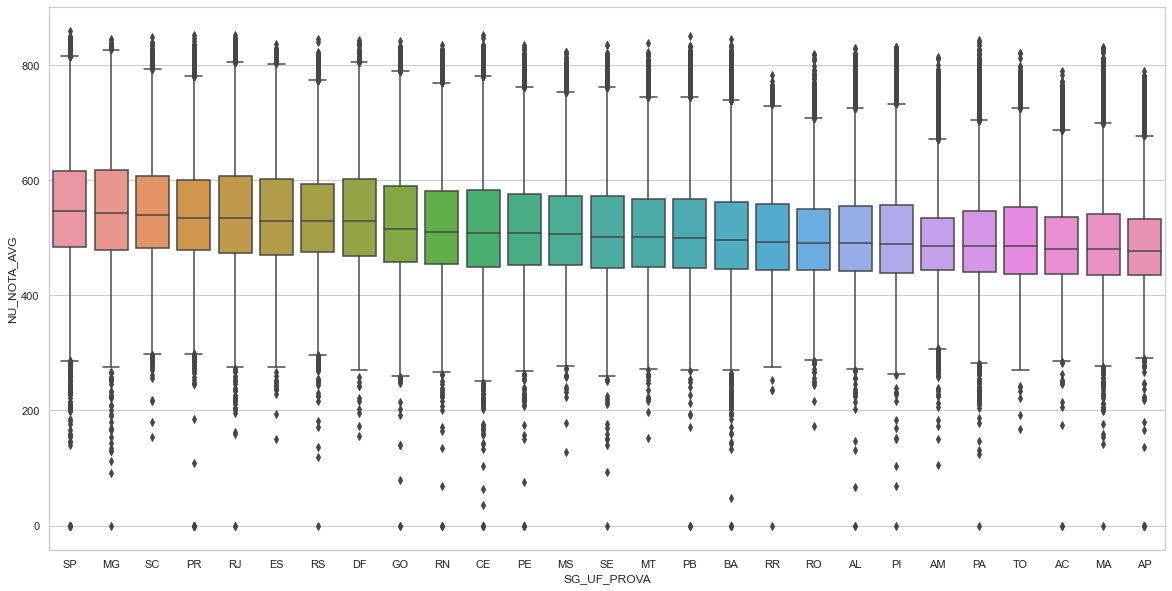

In [80]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1, style='whitegrid')
sns.boxplot(x='SG_UF_PROVA', y='NU_NOTA_AVG', data=data, order = median_nota_estado_ordenado.SG_UF_PROVA)

Olhando para o gráfico e para as medianas é possível verificar uma diferença entre os estados.<br>
Especificamente falando da mediana, existe uma diferença de 68,53 pontos entre o primeiro colocado, São Paulo que tem 546,28 e o último colocado, Amapá que tem 477,75.<br>

#### Esta diferença é explicada pela renda?

Se olharmos para a média da renda dos estados, existe uma correlação linear entre mediana (ou média) de notas e a renda familiar dos candidatos?<br>

Se encontrarmos estados que possuem renda mais baixa e nota mais baixa, isto indica que existe outros fatores que podem auxiliar melhorar as notas mesmo que a renda não acompanhe o crescimento.

```
A -> Nenhuma Renda
B -> Até R$ 1.045,00
C -> De R$ 1.045,01 até R$ 1.567,50
D -> De R$ 1.567,51 até R$ 2.090,00
E -> De R$ 2.090,01 até R$ 2.612,50
F -> De R$ 2.612,51 até R$ 3.135,00
G -> De R$ 3.135,01 até R$ 4.180,00
H -> De R$ 4.180,01 até R$ 5.225,00
I -> De R$ 5.225,01 até R$ 6.270,00
J -> De R$ 6.270,01 até R$ 7.315,00
K -> De R$ 7.315,01 até R$ 8.360,00
L -> De R$ 8.360,01 até R$ 9.405,00
M -> De R$ 9.405,01 até R$ 10.450,00
N -> De R$ 10.450,01 até R$ 12.540,00
O -> De R$ 12.540,01 até R$ 15.675,00
P -> De R$ 15.675,01 até R$ 20.900,00
Q -> Acima de R$ 20.900,00
```

Para fins de tentar verificar esta relação, será gerado um novo dataset contendo dados dos estados, incluindo a quantidade de candidatos com renda familiar superior a R$6270,00.<br>
Desta forma, as colunas geradas são:<br>
* SG_UF_PROVA
* Candidatos
* QtdCandidatosRendaSuperior
* NO_NOTA_MEDIAN
* NO_NOTA_MEAN
* QtdCandidatosRendaSuperior%

In [81]:
# create a list of our conditions
conditions = [
    (data['Q006'] == 'A') | (data['Q006'] == 'B') | (data['Q006'] == 'C') | (data['Q006'] == 'D') | (data['Q006'] == 'E') | (data['Q006'] == 'F') | (data['Q006'] == 'G') | (data['Q006'] == 'H') | (data['Q006'] == 'I'),
    (data['Q006'] == 'J') | (data['Q006'] == 'K') | (data['Q006'] == 'L') | (data['Q006'] == 'M') | (data['Q006'] == 'N') | (data['Q006'] == 'O') | (data['Q006'] == 'P') | (data['Q006'] == 'Q')
    ]

# create a list of the values we want to assign for each condition
values = ['Até R$ 6.270,00', 'Mais que R$ 6.270,00']

# create a new column and use np.select to assign values to it using our lists as arguments
data['RendaFamiliarAgrupada'] = np.select(conditions, values)

renda_familiar_agrupada = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
renda_familiar_agrupada['QtdCandidatosRendaSuperior'] =  data[data['RendaFamiliarAgrupada'] == 'Mais que R$ 6.270,00'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
renda_familiar_agrupada['NO_NOTA_MEDIAN'] =  data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].median().reset_index(drop=True)
renda_familiar_agrupada['NO_NOTA_MEAN'] =  data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].mean().reset_index(drop=True)
renda_familiar_agrupada['QtdCandidatosRendaSuperior%'] = renda_familiar_agrupada['QtdCandidatosRendaSuperior'] / renda_familiar_agrupada['Candidatos']

PrintAll(renda_familiar_agrupada)

   SG_UF_PROVA  Candidatos  QtdCandidatosRendaSuperior  NO_NOTA_MEDIAN  \
25          SP      321532                       44992          546.28   
10          MG      219319                       19334          542.22   
4           BA      181630                        7236          495.86   
18          RJ      152306                       17741          534.86   
13          PA      136098                        4050          486.34   
5           CE      130162                        4945          508.86   
15          PE      128395                        6239          508.32   
9           MA       98810                        2840          479.92   
22          RS       95435                        9549          528.88   
17          PR       91462                       11149          534.95   
14          PB       73487                        2882          499.76   
8           GO       72821                        5640          514.92   
19          RN       57809            

2022-07-14 22:35:53.313507 - Started
2022-07-14 22:35:53.552726 - Finished


,NO_NOTA_MEDIAN,QtdCandidatosRendaSuperior%
NO_NOTA_MEDIAN,1.000000,0.776448
QtdCandidatosRendaSuperior%,0.776448,1.000000


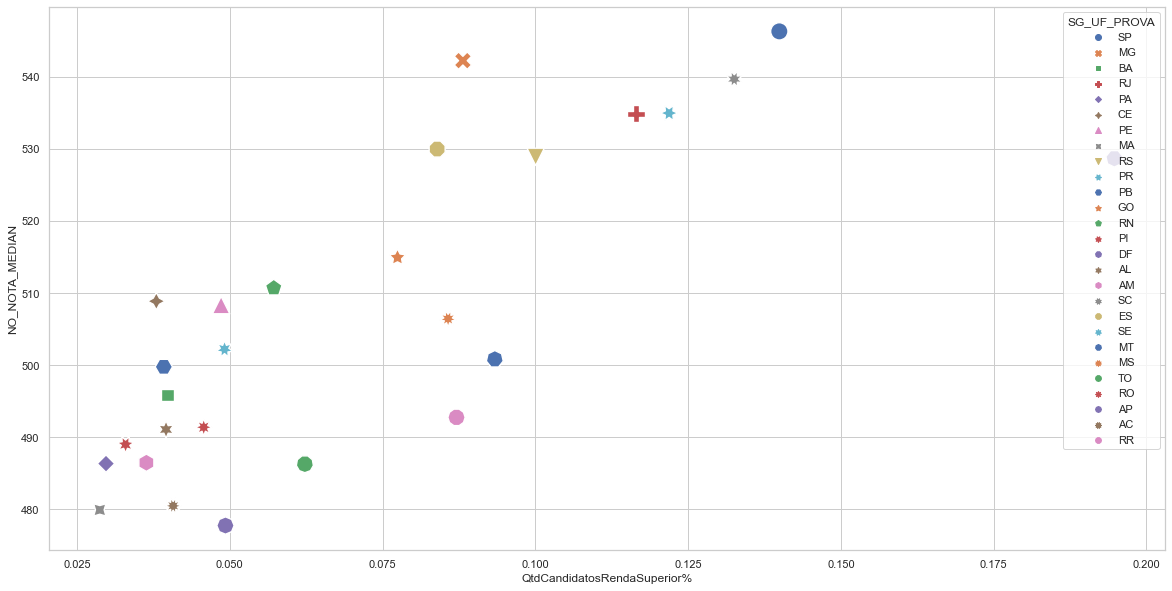

In [82]:
print(f"{datetime.now()} - Started")

# [Dúvida] -> Como ajustar os eixos X e Y para serem iguais e comparáveis.
#x = sns.scatterplot(renda_familiar_agrupada[['NO_NOTA_MEDIAN', 'SG_UF_PROVA', 'QtdCandidatosRendaSuperior%']], hue='SG_UF_PROVA', plot_kws={"s":15})
sns.scatterplot(data=renda_familiar_agrupada, x="QtdCandidatosRendaSuperior%", y="NO_NOTA_MEDIAN", hue="SG_UF_PROVA", palette="deep", style="SG_UF_PROVA", s=300)
sns.regplot(x="QtdCandidatosRendaSuperior%", y="NO_NOTA_MEDIAN", data=renda_familiar_agrupada, scatter=False, ax=g.axes[0, 0])

print(f"{datetime.now()} - Finished")

renda_familiar_agrupada[['NO_NOTA_MEDIAN', 'QtdCandidatosRendaSuperior%']].corr()

In [83]:
#import seaborn as sns
#from scipy import stats

## get coeffs of linear fit
#slope, intercept, r_value, p_value, std_err = stats.linregress(renda_familiar_agrupada['QtdCandidatosRendaSuperior%'],renda_familiar_agrupada['NO_NOTA_MEDIAN'])

## Use lmplot to plot scatter points
#x = sns.lmplot(x='QtdCandidatosRendaSuperior%', y='NO_NOTA_MEDIAN', hue='SG_UF_PROVA', data=renda_familiar_agrupada, fit_reg=False, legend=False)

## Use regplot to plot the regression line and use line_kws to set line label for legend
#ax = sns.regplot(x="QtdCandidatosRendaSuperior%", y="NO_NOTA_MEDIAN", data=renda_familiar_agrupada, scatter_kws={"zorder":-1},
#line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
#x.fig.set_size_inches(20,10)

## plot legend
#ax.legend()

***
### Removendo Outras Colunas

A coluna NU_ANO representa o ano do ENEM e é igual para todo mundo. Pode ser removida.<br>
A coluna TP_ESCOLA, que serviria para descobrir se a escola é pública ou privada tem grande parte dos dados na categoria "Não Respondeu". Pode ser removida.<br>
A coluna TP_NACIONALIDADE tem grande maioria dos candidatos sendo brasileiro. Pode ser removida.<br>
A coluna CO_MUNICIPIO_PROVA tem um código que referência a região, estado e cidade. Mas não existe um mapeamento para o código. Pode ser removida.<br>
A coluna CO_UF_PROVA tem as mesmas informações da coluna SF_UF_PROVA mas no formato de código. Pode ser removida.<br>
As colunas CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC e CO_PROVA_MT foram removidas por serem apenas a cor da prova que o candidato fez. <br>
A coluna TP_LINGUA apenas indica a escolha de língua extrangeira para a prova.

In [84]:
dados_por_ano = data.groupby('NU_ANO').size().sort_values(ascending=False).reset_index(name='count')
PrintAll(dados_por_ano)

   NU_ANO    count
0    2020  2214797


In [85]:
print(f"Shape before: {data.shape}")
data.drop('NU_ANO', inplace=True, axis=1)
data.drop('TP_ESCOLA', inplace=True, axis=1)
data.drop('TP_NACIONALIDADE', inplace=True, axis=1)
data.drop('CO_MUNICIPIO_PROVA', inplace=True, axis=1)
data.drop('CO_UF_PROVA', inplace=True, axis=1)
data.drop('CO_PROVA_CN', inplace=True, axis=1)
data.drop('CO_PROVA_CH', inplace=True, axis=1)
data.drop('CO_PROVA_LC', inplace=True, axis=1)
data.drop('CO_PROVA_MT', inplace=True, axis=1)
data.drop('TP_LINGUA', inplace=True, axis=1)
print(f"Shape after: {data.shape}")

Shape before: (2214797, 57)
Shape after: (2214797, 47)


## Exportando o Dataset Filtrado (Parte 1)



In [86]:
data.to_csv(r'D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\Entrega 1\ENEM2020FINAL.csv', index=False)

## Outras possibilidades de remoção de colunas:
1. Remover as notas de cada tipo de prova, dado que temos a média das provas que é a nota final.
1. Tirar as nota da redação e de cada um dos critérios dela.

## Outras questões que podem ser verificadas no nosso trabalho
1. O dado socioeconomico tem resultado igual para todos os tamanhos de cidade?
1. Cidades maiores, com universidades, tem resultado médio melhor?
1. Quais são as melhores cidades em média de nota?
1. A proporção de candidatos é a mesma indepenten do tamanho do centro urbano?

***
## Parte 2 - Estados

## Agrupando por Estados

Partindo para a segunda (e final) etapa do trabalho, decidimos focar as próximas análises focando em informações por estado, ao invés de focar em dados de cada candidatos que fez as provas.

Para fins de conseguir uma quantidade diferente de variáveis, agruparemos os dados de nota do ENEM por estado e buscaremos outros informações de fontes externas que expliquem as características dos estados, de forma a ser possível identificar outros fatores que importem na média das notas além da situação econômica do candidato. (FEITO)


In [192]:
data.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025', 'NU_NOTA_AVG', 'RendaFamiliarAgrupada', 'Cat_Esc_Pai',
       'Cat_Esc_Mae', 'Cat_Comp_Casa', 'Cat_Renda_Familiar',
       'Renda_Familiar_Per_Capita'],
      dtype='object')

### Média de Notas por Estado

In [193]:
dados_por_estado = data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].mean().reset_index(name='NOTA_AVG').sort_values(by='NOTA_AVG', ascending=False)
candidatos_por_estado = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
dados_por_estado = dados_por_estado.merge(candidatos_por_estado, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos
0,SP,552.757181,321532
1,MG,550.626701,219319
2,SC,547.371163,41900
3,PR,543.112924,91462
4,RJ,542.637533,152306
5,ES,539.292367,39921
6,DF,538.699658,47456
7,RS,538.274657,95435
8,GO,528.106676,72821
9,RN,522.128820,57809


In [194]:
dados_por_estado_nota_3rd = data.groupby('SG_UF_PROVA')['NU_NOTA_AVG'].quantile(0.75).reset_index(name='NOTA_3ro_Quartil').sort_values(by='NOTA_3ro_Quartil', ascending=False)
dados_por_estado = dados_por_estado.merge(dados_por_estado_nota_3rd, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil
0,SP,552.757181,321532,616.800
1,MG,550.626701,219319,618.040
2,SC,547.371163,41900,606.765
3,PR,543.112924,91462,600.100
4,RJ,542.637533,152306,606.560
5,ES,539.292367,39921,603.000
6,DF,538.699658,47456,602.905
7,RS,538.274657,95435,594.340
8,GO,528.106676,72821,590.580
9,RN,522.128820,57809,580.840


### Escolaridade Pai

Separamos a escolaridade do pai em alguns grupos, baseado na variável Q001:

| ID do Grupo Original | Grupo no Dataset Final | Grupo Original |
|-----|-----|-----|
| A | Esc_Pai_Baixa | Nunca estudou |
| B | Esc_Pai_Baixa | Não completou a 4ª série/5º ano do Ensino Fundamental |
| C | Esc_Pai_Media | Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental |
| D | Esc_Pai_Media | Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio |
| E | Esc_Pai_Media | Completou o Ensino Médio, mas não completou a Faculdade |
| F | Esc_Pai_Alta | Completou a Faculdade, mas não completou a Pós-graduação |
| G | Esc_Pai_Alta | Completou a Pós-graduação |
| H | Esc_Pai_Indefinida | Não sei |

In [195]:
# create a list of our conditions
conditions = [
    (data['Q001'] == 'A') | (data['Q001'] == 'B'),
    (data['Q001'] == 'C') | (data['Q001'] == 'D') | (data['Q001'] == 'E'),
    (data['Q001'] == 'F') | (data['Q001'] == 'G'),
    (data['Q001'] == 'H')
    ]

# create a list of the values we want to assign for each condition
values = ['Esc_Pai_Baixa', 'Esc_Pai_Media', 'Esc_Pai_Alta' , 'Esc_Pai_Indefinida']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cat_Esc_Pai'] = np.select(conditions, values)

dados_escolaridade_pai = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
dados_escolaridade_pai['Esc_Pai_Baixa'] = data[data['Cat_Esc_Pai'] == 'Esc_Pai_Baixa'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_pai['Esc_Pai_Media'] = data[data['Cat_Esc_Pai'] == 'Esc_Pai_Media'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_pai['Esc_Pai_Alta'] = data[data['Cat_Esc_Pai'] == 'Esc_Pai_Alta'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_pai['Esc_Pai_Indefinida'] = data[data['Cat_Esc_Pai'] == 'Esc_Pai_Indefinida'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_pai.drop('Candidatos', inplace=True, axis=1)
dados_escolaridade_pai

,SG_UF_PROVA,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida
25,SP,50267,181447,68925,20893
10,MG,50535,122190,30437,16157
4,BA,55925,95392,15121,15192
18,RJ,24892,88438,25645,13331
13,PA,41858,69111,10760,14369
5,CE,42193,64631,10376,12962
15,PE,35739,69447,12753,10456
9,MA,29141,52788,7758,9123
22,RS,19101,56320,13597,6417
17,PR,15770,51490,17625,6577


In [196]:
dados_por_estado = dados_por_estado.merge(dados_escolaridade_pai, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida
0,SP,552.757181,321532,616.800,50267,181447,68925,20893
1,MG,550.626701,219319,618.040,50535,122190,30437,16157
2,SC,547.371163,41900,606.765,7241,24000,8105,2554
3,PR,543.112924,91462,600.100,15770,51490,17625,6577
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331
5,ES,539.292367,39921,603.000,8384,22679,5573,3285
6,DF,538.699658,47456,602.905,9460,22466,11340,4190
7,RS,538.274657,95435,594.340,19101,56320,13597,6417
8,GO,528.106676,72821,590.580,17704,39414,9707,5996
9,RN,522.128820,57809,580.840,18677,28874,6049,4209


### Escolaridade Mãe

Separamos a escolaridade do pai em alguns grupos, baseado na variável Q002:

| ID do Grupo Original | Grupo no Dataset Final | Grupo Original |
|-----|-----|-----|
| A | Esc_Mae_Baixa | Nunca estudou|
| B | Esc_Mae_Baixa | Não completou a 4ª série/5º ano do Ensino Fundamental |
| C | Esc_Mae_Media | Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental |
| D | Esc_Mae_Media | Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio |
| E | Esc_Mae_Media | Completou o Ensino Médio, mas não completou a Faculdade |
| F | Esc_Mae_Alta | Completou a Faculdade, mas não completou a Pós-graduação |
| G | Esc_Mae_Alta | Completou a Pós-graduação |
| H | Esc_Mae_Indefinida | Não sei |

In [197]:
# create a list of our conditions
conditions = [
    (data['Q002'] == 'A') | (data['Q002'] == 'B'),
    (data['Q002'] == 'C') | (data['Q002'] == 'D') | (data['Q002'] == 'E'),
    (data['Q002'] == 'F') | (data['Q002'] == 'G'),
    (data['Q002'] == 'H')
    ]

# create a list of the values we want to assign for each condition
values = ['Esc_Mae_Baixa', 'Esc_Mae_Media', 'Esc_Mae_Alta' , 'Esc_Mae_Indefinida']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cat_Esc_Mae'] = np.select(conditions, values)

dados_escolaridade_mae = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
dados_escolaridade_mae['Esc_Mae_Baixa'] = data[data['Cat_Esc_Mae'] == 'Esc_Mae_Baixa'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_mae['Esc_Mae_Media'] = data[data['Cat_Esc_Mae'] == 'Esc_Mae_Media'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_mae['Esc_Mae_Alta'] = data[data['Cat_Esc_Mae'] == 'Esc_Mae_Alta'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_mae['Esc_Mae_Indefinida'] = data[data['Cat_Esc_Mae'] == 'Esc_Mae_Indefinida'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_escolaridade_mae.drop('Candidatos', inplace=True, axis=1)
dados_escolaridade_mae

,SG_UF_PROVA,Esc_Mae_Baixa,Esc_Mae_Media,Esc_Mae_Alta,Esc_Mae_Indefinida
25,SP,39174,188948,88292,5118
10,MG,37866,126908,50200,4345
4,BA,39804,107591,29891,4344
18,RJ,20275,96059,32653,3319
13,PA,30336,82613,19176,3973
5,CE,31912,74188,17767,6295
15,PE,26389,77375,21649,2982
9,MA,19803,61228,15313,2466
22,RS,15100,58609,20230,1496
17,PR,13057,52127,24479,1799


In [198]:
dados_por_estado = dados_por_estado.merge(dados_escolaridade_mae, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida,Esc_Mae_Baixa,Esc_Mae_Media,Esc_Mae_Alta,Esc_Mae_Indefinida
0,SP,552.757181,321532,616.800,50267,181447,68925,20893,39174,188948,88292,5118
1,MG,550.626701,219319,618.040,50535,122190,30437,16157,37866,126908,50200,4345
2,SC,547.371163,41900,606.765,7241,24000,8105,2554,5801,24084,11397,618
3,PR,543.112924,91462,600.100,15770,51490,17625,6577,13057,52127,24479,1799
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331,20275,96059,32653,3319
5,ES,539.292367,39921,603.000,8384,22679,5573,3285,6675,23553,8810,883
6,DF,538.699658,47456,602.905,9460,22466,11340,4190,7267,25331,13883,975
7,RS,538.274657,95435,594.340,19101,56320,13597,6417,15100,58609,20230,1496
8,GO,528.106676,72821,590.580,17704,39414,9707,5996,11553,43319,16357,1592
9,RN,522.128820,57809,580.840,18677,28874,6049,4209,13190,33848,9731,1040


### Acesso Computador em Casa

Separamos os dados de acesso a computador em casa em dois grupos, baseado na variável Q024:

| ID do Grupo Original | Grupo no Dataset Final | Grupo Original |
|-----|-----|-----|
| A | Não | Não |
| B | Sim | Sim, um |
| C | Sim | Sim, dois |
| D | Sim | Sim, três |
| E | Sim | Sim, quatro ou mais |


In [199]:
# create a list of our conditions
conditions = [
    (data['Q024'] == 'A'),
    (data['Q024'] == 'B') | (data['Q024'] == 'C') | (data['Q024'] == 'D') | (data['Q024'] == 'E')
    ]

# create a list of the values we want to assign for each condition
values = ['Comp_Casa_Não', 'Comp_Casa_Sim']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cat_Comp_Casa'] = np.select(conditions, values)

dados_comp_casa = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
dados_comp_casa['Comp_Casa_Sim'] = data[data['Cat_Comp_Casa'] == 'Comp_Casa_Sim'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_comp_casa.drop('Candidatos', inplace=True, axis=1)
dados_comp_casa

,SG_UF_PROVA,Comp_Casa_Sim
25,SP,233599
10,MG,147181
4,BA,79671
18,RJ,100265
13,PA,41198
5,CE,48680
15,PE,58999
9,MA,29511
22,RS,65654
17,PR,65800


In [200]:
dados_por_estado = dados_por_estado.merge(dados_comp_casa, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida,Esc_Mae_Baixa,Esc_Mae_Media,Esc_Mae_Alta,Esc_Mae_Indefinida,Comp_Casa_Sim
0,SP,552.757181,321532,616.800,50267,181447,68925,20893,39174,188948,88292,5118,233599
1,MG,550.626701,219319,618.040,50535,122190,30437,16157,37866,126908,50200,4345,147181
2,SC,547.371163,41900,606.765,7241,24000,8105,2554,5801,24084,11397,618,31415
3,PR,543.112924,91462,600.100,15770,51490,17625,6577,13057,52127,24479,1799,65800
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331,20275,96059,32653,3319,100265
5,ES,539.292367,39921,603.000,8384,22679,5573,3285,6675,23553,8810,883,25437
6,DF,538.699658,47456,602.905,9460,22466,11340,4190,7267,25331,13883,975,32690
7,RS,538.274657,95435,594.340,19101,56320,13597,6417,15100,58609,20230,1496,65654
8,GO,528.106676,72821,590.580,17704,39414,9707,5996,11553,43319,16357,1592,41450
9,RN,522.128820,57809,580.840,18677,28874,6049,4209,13190,33848,9731,1040,29107


### Acesso à Internet

Separamos os dados de acesso a computador em casa em dois grupos, baseado na variável Q025:

| ID do Grupo Original | Grupo no Dataset Final | Grupo Original |
|-----|-----|-----|
| A | Não | Não |
| B | Sim | Sim |

In [201]:
dados_internet_casa = data.groupby('SG_UF_PROVA').size().reset_index(name='Candidatos').sort_values(by='Candidatos', ascending=False)
dados_internet_casa['Internet_Casa_Sim'] = data[data['Q024'] == 'B'].groupby('SG_UF_PROVA').size().reset_index(drop=True)
dados_internet_casa.drop('Candidatos', inplace=True, axis=1)
dados_internet_casa

,SG_UF_PROVA,Internet_Casa_Sim
25,SP,166587
10,MG,115112
4,BA,68305
18,RJ,74947
13,PA,35191
5,CE,40172
15,PE,48655
9,MA,25411
22,RS,49367
17,PR,47423


In [202]:
dados_por_estado = dados_por_estado.merge(dados_internet_casa, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida,Esc_Mae_Baixa,Esc_Mae_Media,Esc_Mae_Alta,Esc_Mae_Indefinida,Comp_Casa_Sim,Internet_Casa_Sim
0,SP,552.757181,321532,616.800,50267,181447,68925,20893,39174,188948,88292,5118,233599,166587
1,MG,550.626701,219319,618.040,50535,122190,30437,16157,37866,126908,50200,4345,147181,115112
2,SC,547.371163,41900,606.765,7241,24000,8105,2554,5801,24084,11397,618,31415,22352
3,PR,543.112924,91462,600.100,15770,51490,17625,6577,13057,52127,24479,1799,65800,47423
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331,20275,96059,32653,3319,100265,74947
5,ES,539.292367,39921,603.000,8384,22679,5573,3285,6675,23553,8810,883,25437,19980
6,DF,538.699658,47456,602.905,9460,22466,11340,4190,7267,25331,13883,975,32690,22139
7,RS,538.274657,95435,594.340,19101,56320,13597,6417,15100,58609,20230,1496,65654,49367
8,GO,528.106676,72821,590.580,17704,39414,9707,5996,11553,43319,16357,1592,41450,33644
9,RN,522.128820,57809,580.840,18677,28874,6049,4209,13190,33848,9731,1040,29107,23689


### Estimativa de Renda por Morador da Residência


#### Categorizando a renda

Primeiro levaremos em conta a média de cada faixa de renda colocada no relatório, assumindo que a distribuição dentro de cada faixa de renda seja uma distribuição normal e que portanto média e mediana estariam próximas da metade.
Usaremos este valor para substituir pela categoria do candidato, portanto:

| ID do Grupo Original | Grupo no Dataset Final | Grupo Original |
|-----|-----|-----|
| A | 0   | Nenhuma Renda |
| B | 523 | Até RS 1.045,00 |
| C | 1306 | De RS 1.045,01 até RS 1.567,50 |
| D | 1829 | De RS 1.567,51 até RS 2.090,00 |
| E | 2351 | De RS 2.090,01 até RS 2.612,50 |
| F | 2874 | De RS 2.612,51 até RS 3.135,00 |
| G | 3658 | De RS 3.135,01 até RS 4.180,00 |
| H | 4703 | De RS 4.180,01 até RS 5.225,00 |
| I | 5748 | De RS 5.225,01 até RS 6.270,00 |
| J | 6793 | De RS 6.270,01 até RS 7.315,00 |
| K | 7838 | De RS 7.315,01 até RS 8.360,00 |
| L | 8883 | De RS 8.360,01 até RS 9.405,00 |
| M | 9928 | De RS 9.405,01 até RS 10.450,00 |
| N | 11495 | De RS 10.450,01 até RS 12.540,00 |
| O | 14108 | De RS 12.540,01 até RS 15.675,00 |
| P | 18288 | De RS 15.675,01 até RS 20.900,00 |
| Q | 20900 | Acima de RS 20.900,00 |

Para os casos onde existia uma faixa de renda bem definida, foi pego o valor médio de cada faixa:
Grupo no Dataset Final = Renda_MIN + ((Renda_MAX - Renda_MIN) / 2)

OBS: O tratamento destes dados foi feito à mão em um arquivo de excel.

#### Dados de Pessoas na casa e Renda Familiar Per Capita

As categorias para este dado já estão definitadas entre 1 e 20 diretamente e portanto serão estes os valores usados para realizar a divisão

In [203]:
# create a list of our conditions
conditions = [
    (data['Q006'] == 'A'),
    (data['Q006'] == 'B'),
    (data['Q006'] == 'C'),
    (data['Q006'] == 'D'),
    (data['Q006'] == 'E'),
    (data['Q006'] == 'F'),
    (data['Q006'] == 'G'),
    (data['Q006'] == 'H'),
    (data['Q006'] == 'I'),
    (data['Q006'] == 'J'),
    (data['Q006'] == 'K'),
    (data['Q006'] == 'L'),
    (data['Q006'] == 'M'),
    (data['Q006'] == 'N'),
    (data['Q006'] == 'O'),
    (data['Q006'] == 'P'),
    (data['Q006'] == 'Q')
    ]

# create a list of the values we want to assign for each condition
values = [0, 523, 1306, 1829, 2351, 2874, 3658, 4703, 5748, 6793, 7838, 8883, 9928, 11495, 14108, 18288, 20900]

# create a new column and use np.select to assign values to it using our lists as arguments
data['Cat_Renda_Familiar'] = np.select(conditions, values)
data['Renda_Familiar_Per_Capita'] = data['Cat_Renda_Familiar'] / data['Q005']


In [204]:
dados_renda_per_capita_familiar = data.groupby('SG_UF_PROVA')['Renda_Familiar_Per_Capita'].mean().reset_index(name='Renda_Familiar_Per_Capita').sort_values(by='Renda_Familiar_Per_Capita', ascending=False)
dados_renda_per_capita_familiar

,SG_UF_PROVA,Renda_Familiar_Per_Capita
6,DF,1141.422568
23,SC,1098.624765
25,SP,1041.385475
17,PR,1010.239854
22,RS,966.996551
18,RJ,905.864752
12,MT,837.248573
10,MG,806.038622
11,MS,785.907135
7,ES,784.617783


In [205]:
dados_por_estado = dados_por_estado.merge(dados_renda_per_capita_familiar, left_on='SG_UF_PROVA', right_on='SG_UF_PROVA')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida,Esc_Mae_Baixa,Esc_Mae_Media,Esc_Mae_Alta,Esc_Mae_Indefinida,Comp_Casa_Sim,Internet_Casa_Sim,Renda_Familiar_Per_Capita
0,SP,552.757181,321532,616.800,50267,181447,68925,20893,39174,188948,88292,5118,233599,166587,1041.385475
1,MG,550.626701,219319,618.040,50535,122190,30437,16157,37866,126908,50200,4345,147181,115112,806.038622
2,SC,547.371163,41900,606.765,7241,24000,8105,2554,5801,24084,11397,618,31415,22352,1098.624765
3,PR,543.112924,91462,600.100,15770,51490,17625,6577,13057,52127,24479,1799,65800,47423,1010.239854
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331,20275,96059,32653,3319,100265,74947,905.864752
5,ES,539.292367,39921,603.000,8384,22679,5573,3285,6675,23553,8810,883,25437,19980,784.617783
6,DF,538.699658,47456,602.905,9460,22466,11340,4190,7267,25331,13883,975,32690,22139,1141.422568
7,RS,538.274657,95435,594.340,19101,56320,13597,6417,15100,58609,20230,1496,65654,49367,966.996551
8,GO,528.106676,72821,590.580,17704,39414,9707,5996,11553,43319,16357,1592,41450,33644,734.934584
9,RN,522.128820,57809,580.840,18677,28874,6049,4209,13190,33848,9731,1040,29107,23689,572.482071


## Enriquecimento com dados externos

Optamos por juntar alguns outros dados que representam outros aspectos da educação ou de características e qualidade de vida dos habitantes de cada um dos estados.<br>
Os campos a mais que foram coletados são: <br>
* População_2020
* IDH_2017
* Investimento_educação_2020 em milhões
* Investimento_educação_per_capita_2020
* mortalidade_infantil_tmi_201
* rendimento_domiciliar_per_capita
* matriculas_educação_básica
* matriculas_educação_básica_publica
* estabelecimento_educacao_basica
* estabelecimento_educacao_basica_publicos
* atendimento_escolar_basico
* atendimento_escolar_médio
* conclusão_ensino_medio_até_19_anos
* professores_educacao_basica
* professores_educacao_basica_nivel_superior
* ideb_basico_iniciais
* ideb_basico_finais
* ideb_medio
* indice_atend_agua_snis_2019
* indice_coleta_esgoto_snis_2019
* indice_esgoto_tratado_agua_consumida_snis_2019

Os campos a mais que foram gerados para o dataset final foram:



In [206]:
data_file_dir = 'D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\Fontes de Dados\Dados_Extras_Enriquecimento.xlsx'
dados_extras = pd.read_excel(data_file_dir, sheet_name='Dados')
dados_extras

,SIGLA_ESTADO,Estados,População_2020,IDH_2017,Investimento_educação_2020 em milhões,Investimento_educação_per_capita_2020,mortalidade_infantil_tmi_2019,rendimento_domiciliar_per_capita,matriculas_educação_básica,matriculas_educação_básica_publica,...,atendimento_escolar_médio,conclusão_ensino_medio_até_19_anos,professores_educacao_basica,professores_educacao_basica_nivel_superior,ideb_basico_iniciais,ideb_basico_finais,ideb_medio,indice_atend_agua_snis_2019,indice_coleta_esgoto_snis_2019,indice_esgoto_tratado_agua_consumida_snis_2019
0,AC,ACRE,881935,0.719,1335,1.513717,16.0,890,264593,252107,...,0.663,0.56,11331,0.772,5.8,4.7,3.8,0.4802,0.1946,0.1946
1,RO,RONDÔNIA,1777225,0.725,1402,0.788870,12.5,1136,416212,372709,...,0.674,0.58,15590,0.943,5.8,4.9,4.0,0.4693,0.1141,0.0951
2,AM,AMAZONAS,4144597,0.733,3340,0.805868,17.9,842,1165535,1077614,...,0.659,0.57,45307,0.811,5.4,4.5,3.5,0.8758,0.3118,0.3103
3,RR,RORAIMA,605761,0.752,643,1.061475,18.8,1044,166147,150369,...,0.719,0.64,7836,0.758,5.5,4.1,3.5,0.8167,0.6994,0.1158
4,PA,PARÁ,8602865,0.698,3740,0.434739,16.3,807,2294276,2058911,...,0.576,0.47,84137,0.841,4.7,3.8,3.1,0.4341,0.1964,0.1351
5,AP,AMAPÁ,845731,0.740,1144,1.352676,22.9,880,220269,198959,...,0.684,0.68,10796,0.846,4.6,3.8,3.2,0.3440,0.1793,0.0821
6,TO,TOCANTINS,1572866,0.743,1252,0.795999,14.0,1056,397631,353671,...,0.698,0.62,19290,0.847,5.6,4.6,3.8,0.7934,0.3172,0.3131
7,MA,MARANHÃO,7075181,0.687,2660,0.375962,16.3,636,1993909,1756583,...,0.661,0.58,100466,0.640,4.8,3.9,3.5,0.5539,0.3199,0.1415
8,CE,CEARÁ,9132078,0.735,3082,0.337492,13.5,942,2161816,1743543,...,0.740,0.68,97450,0.849,6.2,5.1,4.1,0.5862,0.3753,0.3590
9,RN,RIO GRANDE DO NORTE,3506853,0.731,1396,0.398078,14.5,1057,820485,649161,...,0.619,0.51,34293,0.863,5.0,3.8,3.2,0.8375,0.3372,0.3350


In [207]:
dados_por_estado = dados_por_estado.merge(dados_extras, left_on='SG_UF_PROVA', right_on='SIGLA_ESTADO')
dados_por_estado

,SG_UF_PROVA,NOTA_AVG,Candidatos,NOTA_3ro_Quartil,Esc_Pai_Baixa,Esc_Pai_Media,Esc_Pai_Alta,Esc_Pai_Indefinida,Esc_Mae_Baixa,Esc_Mae_Media,...,atendimento_escolar_médio,conclusão_ensino_medio_até_19_anos,professores_educacao_basica,professores_educacao_basica_nivel_superior,ideb_basico_iniciais,ideb_basico_finais,ideb_medio,indice_atend_agua_snis_2019,indice_coleta_esgoto_snis_2019,indice_esgoto_tratado_agua_consumida_snis_2019
0,SP,552.757181,321532,616.800,50267,181447,68925,20893,39174,188948,...,0.832,0.78,469057,0.931,6.6,5.3,4.2,0.9620,0.8062,0.6827
1,MG,550.626701,219319,618.040,50535,122190,30437,16157,37866,126908,...,0.782,0.68,223930,0.898,6.5,4.7,3.9,0.8207,0.6678,0.4197
2,SC,547.371163,41900,606.765,7241,24000,8105,2554,5801,24084,...,0.768,0.70,84466,0.898,6.5,5.2,4.1,0.8954,0.3294,0.3115
3,PR,543.112924,91462,600.100,15770,51490,17625,6577,13057,52127,...,0.757,0.71,137660,0.920,6.5,4.9,4.0,0.9466,0.7472,0.7462
4,RJ,542.637533,152306,606.560,24892,88438,25645,13331,20275,96059,...,0.727,0.66,158398,0.729,5.8,4.7,3.9,0.9069,0.5808,0.3979
5,ES,539.292367,39921,603.000,8384,22679,5573,3285,6675,23553,...,0.651,0.58,42260,0.973,6.0,4.7,4.4,0.8132,0.5420,0.4252
6,DF,538.699658,47456,602.905,9460,22466,11340,4190,7267,25331,...,0.744,0.79,30136,0.960,6.3,4.9,4.1,0.9900,0.8228,0.8228
7,RS,538.274657,95435,594.340,19101,56320,13597,6417,15100,58609,...,0.692,0.62,116024,0.861,5.8,4.6,3.7,0.8673,0.3003,0.2587
8,GO,528.106676,72821,590.580,17704,39414,9707,5996,11553,43319,...,0.758,0.73,62599,0.900,6.1,5.3,4.3,0.8852,0.6052,0.5390
9,RN,522.128820,57809,580.840,18677,28874,6049,4209,13190,33848,...,0.619,0.51,34293,0.863,5.0,3.8,3.2,0.8375,0.3372,0.3350


In [208]:
dados_por_estado.drop('SIGLA_ESTADO', inplace=True, axis=1)
dados_por_estado.drop('Estados', inplace=True, axis=1)
dados_por_estado.drop('Investimento_educação_2020 em milhões', inplace=True, axis=1)

In [209]:
dados_por_estado.columns

Index(['SG_UF_PROVA', 'NOTA_AVG', 'Candidatos', 'NOTA_3ro_Quartil',
       'Esc_Pai_Baixa', 'Esc_Pai_Media', 'Esc_Pai_Alta', 'Esc_Pai_Indefinida',
       'Esc_Mae_Baixa', 'Esc_Mae_Media', 'Esc_Mae_Alta', 'Esc_Mae_Indefinida',
       'Comp_Casa_Sim', 'Internet_Casa_Sim', 'Renda_Familiar_Per_Capita',
       'População_2020', 'IDH_2017', 'Investimento_educação_per_capita_2020',
       'mortalidade_infantil_tmi_2019', 'rendimento_domiciliar_per_capita',
       'matriculas_educação_básica', 'matriculas_educação_básica_publica',
       'estabelecimento_educacao_basica',
       'estabelecimento_educacao_basica_publicos',
       'atendimento_escolar_basico', 'atendimento_escolar_médio',
       'conclusão_ensino_medio_até_19_anos', 'professores_educacao_basica',
       'professores_educacao_basica_nivel_superior', 'ideb_basico_iniciais',
       'ideb_basico_finais', 'ideb_medio', 'indice_atend_agua_snis_2019',
       'indice_coleta_esgoto_snis_2019',
       'indice_esgoto_tratado_agua_consumida

In [210]:
dados_por_estado['PCT_Esc_Pai_Baixa'] = dados_por_estado['Esc_Pai_Baixa'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Pai_Media'] = dados_por_estado['Esc_Pai_Media'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Pai_Alta'] = dados_por_estado['Esc_Pai_Alta'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Pai_Indefinida'] = dados_por_estado['Esc_Pai_Indefinida'] / dados_por_estado['Candidatos']

# Drop:
dados_por_estado.drop('Esc_Pai_Baixa', inplace=True, axis=1)
dados_por_estado.drop('Esc_Pai_Media', inplace=True, axis=1)
dados_por_estado.drop('Esc_Pai_Alta', inplace=True, axis=1)
dados_por_estado.drop('Esc_Pai_Indefinida', inplace=True, axis=1)

dados_por_estado['PCT_Esc_Mae_Baixa'] = dados_por_estado['Esc_Mae_Baixa'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Mae_Media'] = dados_por_estado['Esc_Mae_Media'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Mae_Alta'] = dados_por_estado['Esc_Mae_Alta'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Esc_Mae_Indefinida'] = dados_por_estado['Esc_Mae_Indefinida'] / dados_por_estado['Candidatos']

# Drop:
dados_por_estado.drop('Esc_Mae_Baixa', inplace=True, axis=1)
dados_por_estado.drop('Esc_Mae_Media', inplace=True, axis=1)
dados_por_estado.drop('Esc_Mae_Alta', inplace=True, axis=1)
dados_por_estado.drop('Esc_Mae_Indefinida', inplace=True, axis=1)

dados_por_estado['PCT_Comp_Casa_Sim'] = dados_por_estado['Comp_Casa_Sim'] / dados_por_estado['Candidatos']
dados_por_estado['PCT_Internet_Casa_Sim'] = dados_por_estado['Internet_Casa_Sim'] / dados_por_estado['Candidatos']

# Drop:
dados_por_estado.drop('Comp_Casa_Sim', inplace=True, axis=1)
dados_por_estado.drop('Internet_Casa_Sim', inplace=True, axis=1)

dados_por_estado['PCT_Matriculas_Edu_Basica_Escola_Pub'] = dados_por_estado['matriculas_educação_básica_publica'] / dados_por_estado['matriculas_educação_básica']
dados_por_estado['PCT_Estabelecimentos_Edu_Basica_Pub'] = dados_por_estado['estabelecimento_educacao_basica_publicos'] / dados_por_estado['estabelecimento_educacao_basica']
dados_por_estado['Indice_Professores_Por_Aluno_Edu_Basica'] = dados_por_estado['professores_educacao_basica'] / dados_por_estado['matriculas_educação_básica']
dados_por_estado['Indice_Alunos_Por_Estabelecimento_Edu_Basica_Pub'] = dados_por_estado['matriculas_educação_básica_publica'] / dados_por_estado['estabelecimento_educacao_basica_publicos']

# Drop:
dados_por_estado.drop('matriculas_educação_básica_publica', inplace=True, axis=1)
dados_por_estado.drop('matriculas_educação_básica', inplace=True, axis=1)
dados_por_estado.drop('estabelecimento_educacao_basica', inplace=True, axis=1)
dados_por_estado.drop('estabelecimento_educacao_basica_publicos', inplace=True, axis=1)
dados_por_estado.drop('professores_educacao_basica', inplace=True, axis=1)

# Não usados:
# Investimento_educação_2020 em milhões

In [211]:
dados_por_estado.columns

dados_por_estado.rename(columns = {'Candidatos':'Num_Candidatos'}, inplace = True)
dados_por_estado.rename(columns = {'População_2020':'Num_Populacao_2020'}, inplace = True)
dados_por_estado.rename(columns = {'IDH_2017':'Indice_IDH_2017'}, inplace = True)
dados_por_estado.rename(columns = {'Renda_Familiar_Per_Capita_Candidato':'Indice_Renda_Familiar_Per_Capita'}, inplace = True)
dados_por_estado.rename(columns = {'Investimento_educação_per_capita_2020':'Indice_Investimento_Educação_Per_Capita_2020'}, inplace = True)
dados_por_estado.rename(columns = {'rendimento_domiciliar_per_capita':'Indice_Rendimento_Domiciliar_Per_Capita'}, inplace = True)
dados_por_estado.rename(columns = {'atendimento_escolar_basico':'PCT_Atendimento_Escolar_Basico'}, inplace = True)
dados_por_estado.rename(columns = {'atendimento_escolar_médio':'PCT_Atendimento_Escolar_Medio'}, inplace = True)
dados_por_estado.rename(columns = {'conclusão_ensino_medio_até_19_anos':'PCT_Conclusao_Ensino_Medio_Ate_19_Anos'}, inplace = True)
dados_por_estado.rename(columns = {'professores_educacao_basica_nivel_superior':'PCT_Professores_Educacao_Basica_Nivel_Superior'}, inplace = True)
dados_por_estado.rename(columns = {'ideb_basico_iniciais':'Indice_IDEB_Basico_Anos_Iniciais'}, inplace = True)
dados_por_estado.rename(columns = {'ideb_basico_finais':'Indice_IDEB_Basico_Anos_Finais'}, inplace = True)
dados_por_estado.rename(columns = {'ideb_medio':'Indice_IDEB_Medio'}, inplace = True)
dados_por_estado.rename(columns = {'indice_atend_agua_snis_2019':'Indice_Atend_Agua_SNIS_2019'}, inplace = True)
dados_por_estado.rename(columns = {'indice_coleta_esgoto_snis_2019':'Indice_Coleta_Esgoto_SNIS_2019'}, inplace = True)
dados_por_estado.rename(columns = {'indice_esgoto_tratado_agua_consumida_snis_2019':'Indice_Esgoto_Tratado_Agua_Consumida_SNIS_2019'}, inplace = True)

In [214]:
dados_por_estado.describe()#.transpose()
dados_por_estado.columns

Index(['SG_UF_PROVA', 'NOTA_AVG', 'Num_Candidatos', 'NOTA_3ro_Quartil',
       'Renda_Familiar_Per_Capita', 'Num_Populacao_2020', 'Indice_IDH_2017',
       'Indice_Investimento_Educação_Per_Capita_2020',
       'mortalidade_infantil_tmi_2019',
       'Indice_Rendimento_Domiciliar_Per_Capita',
       'PCT_Atendimento_Escolar_Basico', 'PCT_Atendimento_Escolar_Medio',
       'PCT_Conclusao_Ensino_Medio_Ate_19_Anos',
       'PCT_Professores_Educacao_Basica_Nivel_Superior',
       'Indice_IDEB_Basico_Anos_Iniciais', 'Indice_IDEB_Basico_Anos_Finais',
       'Indice_IDEB_Medio', 'Indice_Atend_Agua_SNIS_2019',
       'Indice_Coleta_Esgoto_SNIS_2019',
       'Indice_Esgoto_Tratado_Agua_Consumida_SNIS_2019', 'PCT_Esc_Pai_Baixa',
       'PCT_Esc_Pai_Media', 'PCT_Esc_Pai_Alta', 'PCT_Esc_Pai_Indefinida',
       'PCT_Esc_Mae_Baixa', 'PCT_Esc_Mae_Media', 'PCT_Esc_Mae_Alta',
       'PCT_Esc_Mae_Indefinida', 'PCT_Comp_Casa_Sim', 'PCT_Internet_Casa_Sim',
       'PCT_Matriculas_Edu_Basica_Escola_Pub',
  

## Dicionário de Dados Final

* SG_UF_PROVA: Sigla da unidade da federação.
* NOTA_AVG: média da nota dos candidatos do estado.
* NOTA_3ro_Quartil: 3º quartil da nota dos candidatos do estado.
* Num_Candidatos: Quantidade total de candidatos do estado.
* Renda_Familiar_Per_Capita: Cálculo de renda familiar estimada a partir do questionário socioeconômico, levando em conta a média da faixa de renda que o candidato tem e dividindo este valor pela quantidade de pessoas que moram com ele.
* Num_Populacao_2020: População do estado em 2020.
* Indice_IDH_2017: IDH do estado em 2017.
* Indice_Investimento_Educação_Per_Capita_2020: Valor investido em educação per capita no estado.
* mortalidade_infantil_tmi_2019: Dado de mortalidade infantil do estado em 2019
* Indice_Rendimento_Domiciliar_Per_Capita: Rendimento domiciliar per capita do estado.
* PCT_Atendimento_Escolar_Basico: Percentual de atendimento de ensino básico no estado.
* PCT_Atendimento_Escolar_Medio: Percentual de atendimento de ensino médio no estado.
* PCT_Conclusao_Ensino_Medio_Ate_19_Anos: Percentual de jovens que completam o ensino médio até os 19 anos.
* PCT_Professores_Educacao_Basica_Nivel_Superior: Percentual dos professores de ensino básico que possuem ensino superior.
* Indice_IDEB_Basico_Anos_Iniciais: Nota do IDEB para os primeiros anos do ensino básico.
* Indice_IDEB_Basico_Anos_Finais: Nota do IDEB para os últimos anos do ensino básico.
* Indice_IDEB_Medio: Nota do IDEB para o ensino médio.
* Indice_Atend_Agua_SNIS_2019: Percentual da população com acesso a água tratada.
* Indice_Coleta_Esgoto_SNIS_2019: Percentual da população com coleta de esgoto.
* Indice_Esgoto_Tratado_Agua_Consumida_SNIS_2019: Percentual da população com tratamento feito na agua pós coleta (consumo).
* PCT_Esc_Pai_Baixa: Percentual dos candidatos que tem pai com escolaridade baixa.
* PCT_Esc_Pai_Media: Percentual dos candidatos que tem pai com escolaridade média.
* PCT_Esc_Pai_Alta: : Percentual dos candidatos que tem pai com escolaridade alta.
* PCT_Esc_Pai_Indefinida: : Percentual dos candidatos que tem pai com escolaridade indefinida (não sabe).
* PCT_Esc_Mae_Baixa: Percentual dos candidatos que tem mãe com escolaridade baixa.
* PCT_Esc_Mae_Media: Percentual dos candidatos que tem mãe com escolaridade média.
* PCT_Esc_Mae_Alta: Percentual dos candidatos que tem mãe com escolaridade alta.
* PCT_Esc_Mae_Indefinida: Percentual dos candidatos que tem mãe com escolaridade indefinida (não sabe).
* PCT_Comp_Casa_Sim: Percentual dos candidatos com acesso a pelo menos um computador em casa.
* PCT_Internet_Casa_Sim: Percentual dos candidatos com acesso a internet em casa.
* PCT_Matriculas_Edu_Basica_Escola_Pub: Percentual de alunos de ensino básico do estado que estão matriculados em escola pública.
* PCT_Estabelecimentos_Edu_Basica_Pub: Percentual dos estabelecimentos de ensino básico do estado que fazem parte da rede pública.
* Indice_Professores_Por_Aluno_Edu_Basica: Quantidade de professores por aluno
* Indice_Alunos_Por_Estabelecimento_Edu_Basica_Pub

## Exportando o Dataset final por estado

In [213]:
dados_por_estado.to_csv(r'D:\HPL-Fiorelli\Pessoal\Cursos\SIN\INE5644 - Data Mining\Trabalho 1\ENEM_2020_POR_ESTADO.csv', index=False)

## Referências

https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd <br>
https://seaborn.pydata.org/generated/seaborn.histplot.html <br>
https://seaborn.pydata.org/generated/seaborn.displot.html <br>
https://seaborn.pydata.org/generated/seaborn.countplot.html <br>
https://seaborn.pydata.org/generated/seaborn.barplot.html <br>
https://seaborn.pydata.org/generated/seaborn.pairplot.html <br>
https://www.delftstack.com/pt/howto/seaborn/rotate-tick-labels-seaborn/ <br>
https://www.python-graph-gallery.com/25-histogram-with-several-variables-seabornhttps://www.python-graph-gallery.com/25-histogram-with-several-variables-seaborn <br>
https://machinelearninghd.com/35-seaborn-plot-using-python-color-codes-errors-solutions/ <br>
https://stackoverflow.com/questions/61341988/is-there-a-way-pairplots-could-include-objects-dtypes-variables <br>
https://www.python-graph-gallery.com <br>
https://www.youtube.com/c/joshstarmer <br>

## Referências Dados Extras (Enriquecimento)

https://www.ibge.gov.br/estatisticas/sociais/populacao/9109-projecao-da-populacao.html?utm_source=projecao&utm_medium=popclock&utm_campaign=projecao-2018&t=resultados <br>
https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_IDH <br>
https://www.moderna.com.br/anuario-educacao-basica/2021/financiamento.html <br>
https://www.moderna.com.br/anuario-educacao-basica/2020/estados-rondonia.html <br>
http://svs.aids.gov.br/dantps/centrais-de-conteudos/paineis-de-monitoramento/mortalidade/infantil-e-fetal/ <br>
https://www.moderna.com.br/anuario-educacao-basica/2020 <br>
https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_mortalidade_infantil <br>
http://www.snis.gov.br/diagnostico-anual-agua-e-esgotos/diagnostico-dos-servicos-de-agua-e-esgotos-2019 <br>


### RASCUNHO

In [103]:
from platform import python_version
print(python_version())

3.9.7


In [104]:
data.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'IN_TREINEIRO',
       'NO_MUNICIPIO_PROVA', 'SG_UF_PROVA', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
       'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015',
       'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024',
       'Q025', 'NU_NOTA_AVG', 'RendaFamiliarAgrupada', 'Cat_Esc_Pai',
       'Cat_Esc_Mae', 'Cat_Comp_Casa', 'Cat_Renda_Familiar',
       'Renda_Familiar_Per_Capita'],
      dtype='object')

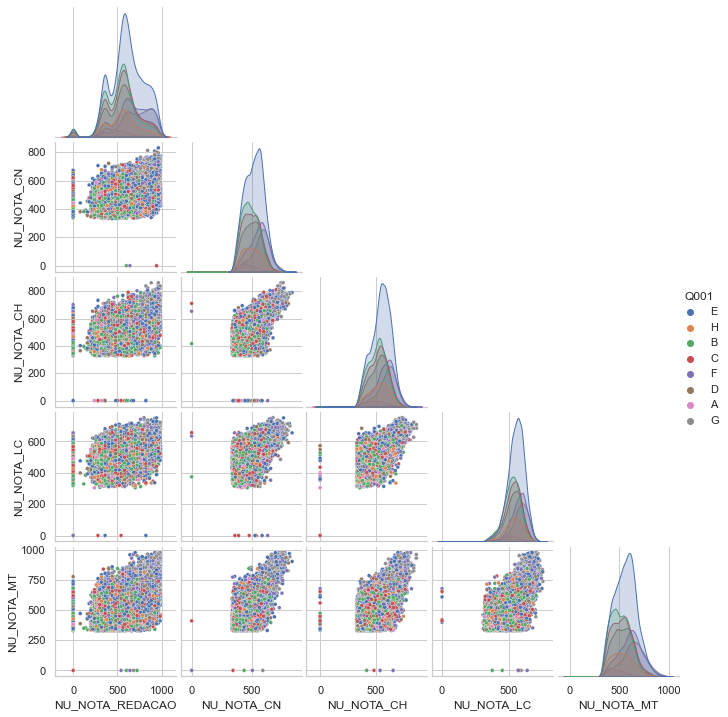

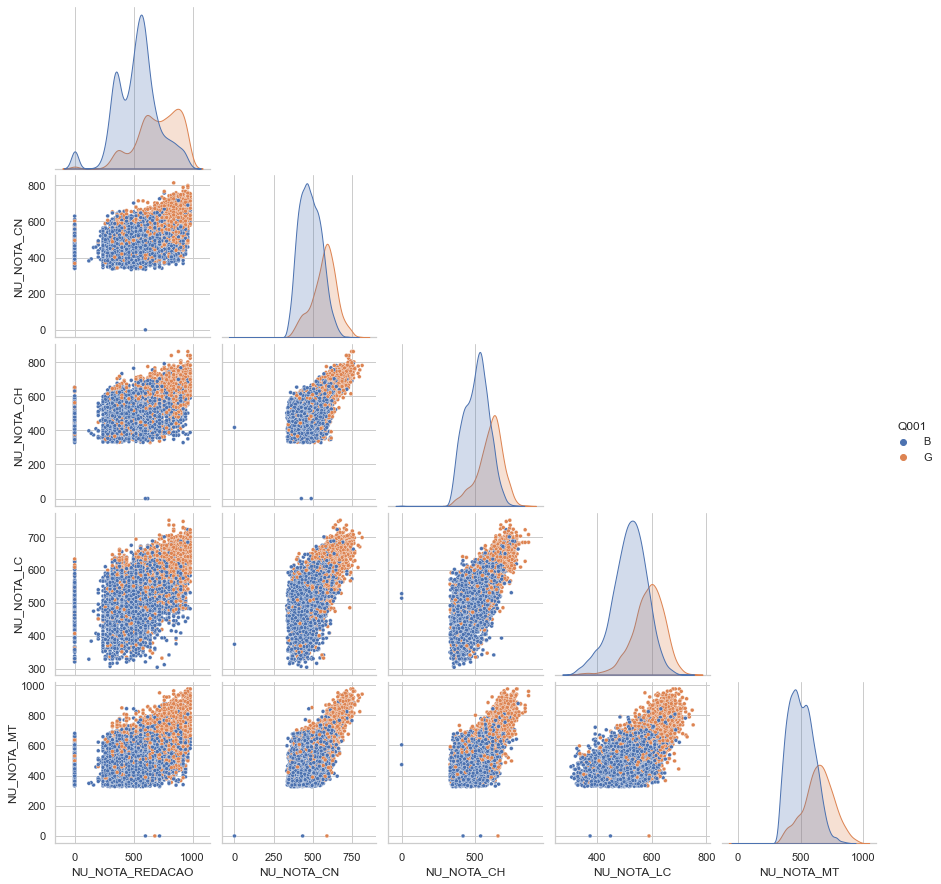

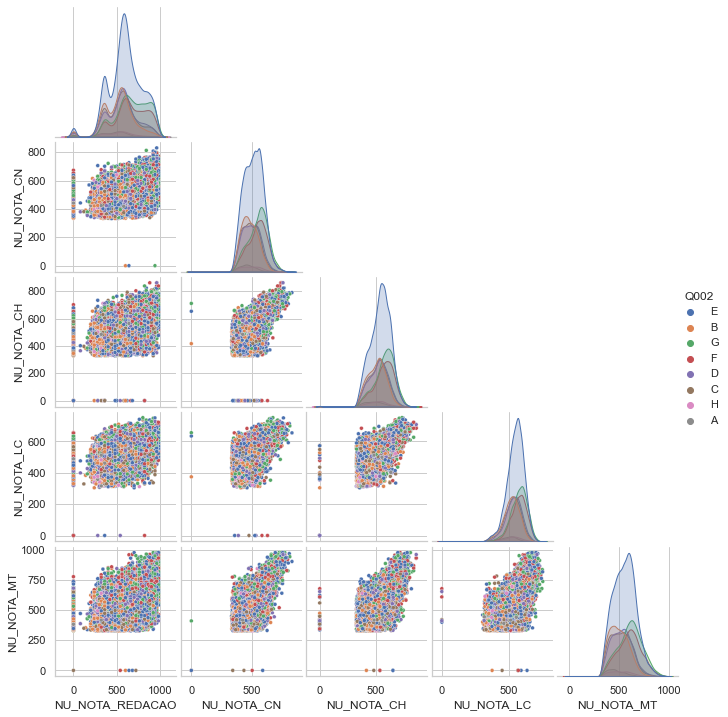

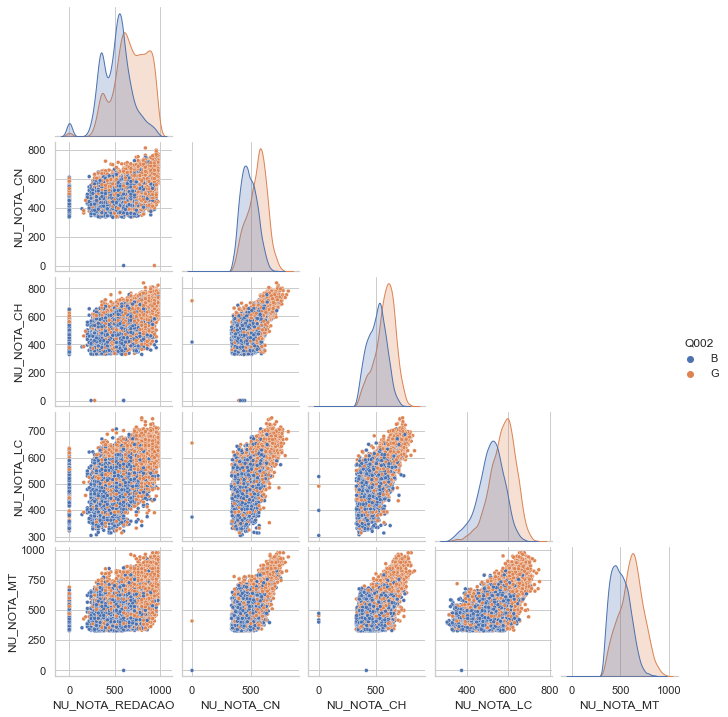

In [105]:
#dados_status_redacao = data.groupby('TP_STATUS_REDACAO').size().reset_index(name='count')
#PrintAll(dados_status_redacao)
#PrintAll(tp_status_redacao)

#dados_nota_comp1 = data.groupby('NU_NOTA_COMP1').size().reset_index(name='count')
#PrintAll(dados_nota_comp1)

#PrintAll(competencias_redacao)
#print(f"{competencias_redacao[1:2]}")

#dados_q01 = data.groupby('Q001').size().reset_index(name='count')
#PrintAll(dados_q01)


###############################################
###############################################
# from platform import python_version
# print(python_version())

###############################################
###############################################

# Forma alternativa de plotar scatters para pares de variáveis:

#for x in names:
#    for y in names:
#    if x != y:
#        data.plot.scatter(x, y)

#sns.pairplot(data, vars=['NU_NOTA_MT', 'Q001', 'Q002', 'Q003', 'Q004'])

###############################################
###############################################
# https://stackoverflow.com/questions/47200033/how-to-adjust-transparency-alpha-in-seaborn-pairplot
# https://stackoverflow.com/questions/66706039/is-there-a-way-to-adjust-the-axes-limits-of-pairplot-but-not-as-individual-pl

# Forma de plotar par de variáveis com uma terceira dando a cor:
# Neste formato, o Q001 é um objeto e não vai ser usado no gráfico, somente no HUE para dar a cor.

#sns.set(style="ticks", color_codes=True)
#sns.pairplot(data[['TP_SEXO', 'TP_FAIXA_ETARIA', 'NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001')
data_sc = data[data['SG_UF_PROVA'] == 'SC']

# TODO:
## 1 - Ao invés de trabalhar com todas as categorias do socio, agrupar elas em categorias que façam sentido
## antes de ver as relações.
## 2 - Verificar quais variáveis parecem dizer a mesma coisa, exemplo de renda e curso superior.
## 3 - Interpretar os resultados.


# Q001:
# [Dúvida] -> Como ajustar os eixos X e Y para serem iguais e comparáveis.
#x = sns.pairplot(data_sc[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001', plot_kws={"line_kws":{"color":"red"}, "scatter_kws": {"alpha": 0.1}}, corner=True, kind='reg')
x = sns.pairplot(data_sc[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001', plot_kws={"s":15}, corner=True, kind='scatter')
x.fig.set_size_inches(10,10)


data_sc_q001 = data_sc[(data_sc['Q001'] == 'B') | (data_sc['Q001'] == 'G')]
x = sns.pairplot(data_sc_q001[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q001']], hue='Q001', plot_kws={"s":15}, corner=True)


# Q002:
x = sns.pairplot(data_sc[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q002']], hue='Q002', plot_kws={"s":15}, corner=True)
x.fig.set_size_inches(10,10)

data_sc_q002 = data_sc[(data_sc['Q002'] == 'B') | (data_sc['Q002'] == 'G')]
x = sns.pairplot(data_sc_q002[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'Q002']], hue='Q002', plot_kws={"s":15}, corner=True)
x.fig.set_size_inches(10,10)


###############################################
###############################################

# Forma de adicionar variável categórica sem ser na cor:

#sns.pairplot(data, vars=['NU_NOTA_MT', 'Q001', 'Q002', 'Q003', 'Q004'])

###############################################
###############################################




#sns.pairplot(data[['Q001', 'NU_NOTA_MT']])

###############################################
###############################################

# Forma de criar Heatmaps. Está falhando por causa da quantidade de dados:

#sns.heatmap(data[['NU_NOTA_CN', 'NU_NOTA_MT']], annot=True, linewidths=.5, ax=ax)

###############################################
###############################################

# Forma de criar violion plot:

#sns.catplot(x="NU_NOTA_CN", y="NU_NOTA_MT", data=data, kind='Q001')
#sns.violinplot(x="NU_NOTA_CN", y="Q001", data=data)